# **MANAGEMENT OF EMPLOYEE ABSENTEEISM PROJECT - PART 2**

### **DATA-CLEANING**

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
emp_data=pd.read_csv("DS1_C9_S7_Project_AbsenteeismAtWork_Data_1.csv",sep=";")
emp_data

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0     33                 239.554  ...                     0          1    2   
1     50                 239.554  ...                     1          1    1   
2     38                 239.554  ...                     0          1    0   
3     39                 239.554  ...                     0          1    2   
4     33                 239.554  ...                     0          1    2   
..   ...                     ...  ...                   ...        ...  ...   
735   33                 264.604  ...                     0          1    2   
736   37                 264.604  ...                     0          3    1   
737   40                 271.219  ...                     0          1    1   
738   39                 271.219  ...                     0          1    2   
739   53                 271.219  ...                     0          1    1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0                 1              0    1      90     172               30   
1                 1              0    0      98     178               31   
2                 1              0    0      89     170               31   
3                 1              1    0      68     168               24   
4                 1              0    1      90     172               30   
..              ...            ...  ...     ...     ...              ...   
735               1              0    1      90     172               30   
736               0              0    1      88     172               29   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism time in hours  
0                            4  
1                            0  
2                            2  
3                            4  
4                            2  
..                         ...  
735                          8  
736                          4  
737     

In [5]:
emp_data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
emp_data.columns=emp_data.columns.str.replace(" ","_")
emp_data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [7]:
emp_data

ID  Reason_for_absence  Month_of_absence  Day_of_the_week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation_expense  Distance_from_Residence_to_Work  Service_time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work_load_Average/day_  ...  Disciplinary_failure  Education  Son  \
0     33                 239.554  ...                     0          1    2   
1     50                 239.554  ...                     1          1    1   
2     38                 239.554  ...                     0          1    0   
3     39                 239.554  ...                     0          1    2   
4     33                 239.554  ...                     0          1    2   
..   ...                     ...  ...                   ...        ...  ...   
735   33                 264.604  ...                     0          1    2   
736   37                 264.604  ...                     0          3    1   
737   40                 271.219  ...                     0          1    1   
738   39                 271.219  ...                     0          1    2   
739   53                 271.219  ...                     0          1    1   

     Social_drinker  Social_smoker  Pet  Weight  Height  Body_mass_index  \
0                 1              0    1      90     172               30   
1                 1              0    0      98     178               31   
2                 1              0    0      89     170               31   
3                 1              1    0      68     168               24   
4                 1              0    1      90     172               30   
..              ...            ...  ...     ...     ...              ...   
735               1              0    1      90     172               30   
736               0              0    1      88     172               29   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism_time_in_hours  
0                            4  
1                            0  
2                            2  
3                            4  
4                            2  
..                         ...  
735                          8  
736                          4  
737     

In [8]:
#info about the columns
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day_           740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

In [9]:
emp_data.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

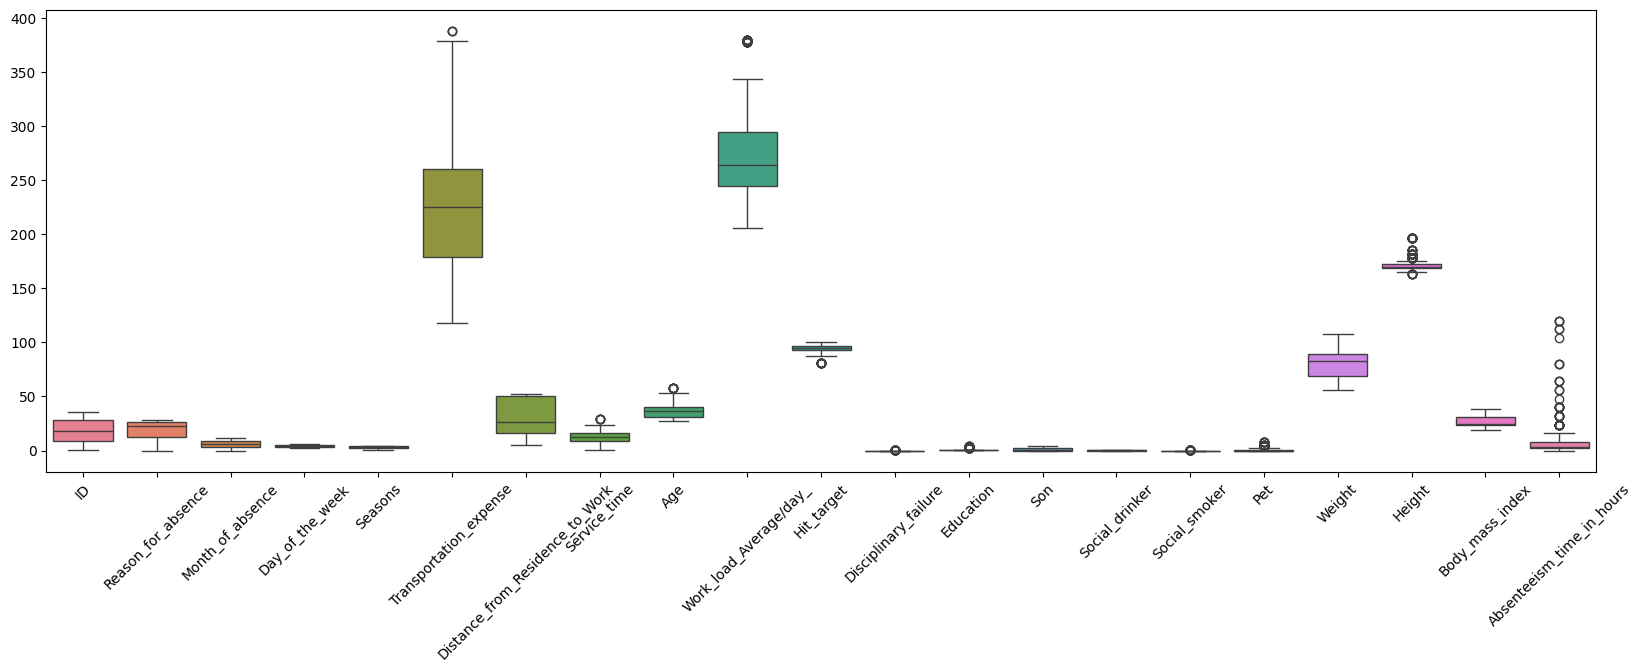

In [10]:
#Box Plot
sns.boxplot(data=emp_data)
plt.gcf().set_size_inches(20,6) #gcf(): get current figure size
plt.xticks(rotation=45)
plt.show()

#### **Binary categorical variables**

In [12]:
treated_df=emp_data

In [13]:
treated_df["Disciplinary_failure"].unique()

array([0, 1], dtype=int64)

In [14]:
# Binary categorical variables
treated_df["Disciplinary_failure_c"] = treated_df["Disciplinary_failure"].map({0: "No Failure", 1: "Failure"})
treated_df["Social_Drinker_c"] = treated_df["Social_drinker"].map({0: "No", 1: "Yes"})
treated_df["Social_Smoker_c"] = treated_df["Social_smoker"].map({0: "No", 1: "Yes"})


#### **Education**

In [16]:
# Defining bins and labels for different categories

treated_df["Education"].unique()

education_bins = [0, 1, 2, 3, 4]  # Assuming education levels are 1, 2, 3, 4
education_labels = ["High School", "Graduate", "Post-Graduate", "Doctorate"]
treated_df["Education_c"] = pd.cut(treated_df["Education"], bins=education_bins, labels=education_labels)

print("Unique Education Categories:", treated_df["Education_c"].unique())

Unique Education Categories: ['High School', 'Post-Graduate', 'Graduate', 'Doctorate']
Categories (4, object): ['High School' < 'Graduate' < 'Post-Graduate' < 'Doctorate']


#### **Seasons**

In [18]:
treated_df["Seasons"].unique()

season_bins = [0, 1, 2, 3, 4]  # Assuming 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter
season_labels = [ "Summer", "Fall", "Winter","Spring"]
treated_df["Seasons_c"] = pd.cut(treated_df["Seasons"], bins=season_bins, labels=season_labels)

print("Unique Season Categories:", treated_df["Seasons_c"].unique())

Unique Season Categories: ['Summer', 'Spring', 'Fall', 'Winter']
Categories (4, object): ['Summer' < 'Fall' < 'Winter' < 'Spring']


#### **Day_of_the_week**

In [20]:
treated_df["Day_of_the_week"].unique()

array([3, 4, 5, 6, 2], dtype=int64)

In [21]:
# Defining bins and labels
bins = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
treated_df["Day_of_the_week_c"] = pd.cut(treated_df["Day_of_the_week"], bins=bins, labels=labels)
treated_df["Day_of_the_week_c"].unique()

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday']
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

#### **Month_of_absence**

In [23]:
treated_df["Month_of_absence"].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0], dtype=int64)

In [24]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]
labels = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
treated_df["Month_of_absence_c"] = pd.cut(treated_df["Month_of_absence"], bins=bins, labels=labels)
treated_df["Month_of_absence_c"].unique()

['July', 'August', 'September', 'October', 'November', ..., 'March', 'April', 'May', 'June', NaN]
Length: 13
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

#### **Reason_for_absence**

In [26]:
treated_df["Reason_for_absence"].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [27]:
absence_groups = {
    "Infectious & Immune System Diseases": [1, 3], 
    "Chronic & Metabolic Diseases": [2, 4], 
    "Mental Health & Neurological Conditions": [5, 6], 
    "Sensory Organ Disorders": [7, 8], 
    "Cardiovascular & Respiratory Conditions": [9, 10], 
    "Digestive & Gastrointestinal Disorders": [11], 
    "Skin & Musculoskeletal Conditions": [12, 13], 
    "Urinary & Reproductive System Conditions": [14, 15], 
    "Birth & Congenital Conditions": [16, 17], 
    "General Symptoms & Injury-Related Absences": [18, 19, 20], 
    "Preventive & Non-Disease-Related Absences": [21, 22, 23, 24, 25, 26, 27, 28]
}

In [28]:
threshold=[4,9,14,18,29]
labels=["Immune & chronic issues", "Neurological and sensory disorders", "Digestive and dermatological", "Urinary & Congenital","General and non-disease related absences"]
#function to assign labels based on conditions
def assign_label(values):
    if values<=threshold[0]: #returns index 0 i.e. (14)
        return labels[0]
    elif values<=threshold[1]:
        return labels[1]
    elif values<=threshold[2]:
        return labels[2]
    elif values<=threshold[3]:
        return labels[3]
    else:
        return labels[4]
#apply function to the columns and create a new column  to create a variable

In [29]:
treated_df["Reason_for_absence_c"]=treated_df["Reason_for_absence"].apply(assign_label)

In [30]:
treated_df["Reason_for_absence_c"].unique()

array(['General and non-disease related absences',
       'Immune & chronic issues', 'Neurological and sensory disorders',
       'Digestive and dermatological', 'Urinary & Congenital'],
      dtype=object)

#### **Absenteeism_time_in_hours**

In [32]:
treated_df["Absenteeism_time_in_hours"].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [33]:
treated_df["Absenteeism_time_in_hours"].mean()

6.924324324324324

In [34]:
treated_df["Absenteeism_time_in_hours_c"]=np.where(treated_df["Absenteeism_time_in_hours"]>treated_df["Absenteeism_time_in_hours"].mean(),"high_absent","low_absent")

In [35]:
treated_df["Absenteeism_time_in_hours_c"].unique()

array(['low_absent', 'high_absent'], dtype=object)

#### **Hit_target**

In [37]:
treated_df["Hit_target"].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91],
      dtype=int64)

In [38]:
treated_df["Hit_target"].mean()

94.58783783783784

In [39]:
treated_df["Hit_target_c"]=np.where(treated_df["Hit_target"]>treated_df["Hit_target"].mean(),"achieved","not_achieved")

In [40]:
treated_df["Hit_target_c"].unique()

array(['achieved', 'not_achieved'], dtype=object)

#### **Age column**

In [42]:
treated_df["Age"].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46, 53], dtype=int64)

In [43]:
threshold=[30,35,40,45,50,55]
labels=["25 to 30","30 to 35","35 to 40","40 to 45","45 to 50","50 to 55","55 to 60"]
def label_assign(values):
    if values<=threshold[0]:
        return labels[0]
    elif values<=threshold[1]:
        return labels[1]
    elif values<=threshold[2]:
        return labels[2]
    elif values<=threshold[3]:
        return labels[3]
    elif values<=threshold[4]:
        return labels[4]
    elif values<=threshold[5]:
        return labels[5]
    else:
        return labels[6]

In [44]:
treated_df["Age_c"]=treated_df["Age"].apply(label_assign)

In [45]:
treated_df["Age_c"].unique()

array(['30 to 35', '45 to 50', '35 to 40', '25 to 30', '40 to 45',
       '55 to 60', '50 to 55'], dtype=object)

#### **Distance_from_Residence_to_Work**

In [47]:
# Categorizing distance to work (close vs. far)
treated_df["Distance_c"] = np.where(treated_df["Distance_from_Residence_to_Work"] > treated_df["Distance_from_Residence_to_Work"].mean(),"Far","Close")
treated_df["Distance_c"].unique()

array(['Far', 'Close'], dtype=object)

#### **Work_load_Average/day_**

In [49]:
# Categorizing workload (high vs. low workload)
treated_df["Workload_c"] = np.where(treated_df["Work_load_Average/day_"] > treated_df["Work_load_Average/day_"].mean(),"High workload","Low workload")
treated_df["Workload_c"].unique()

array(['Low workload', 'High workload'], dtype=object)

In [50]:
# Display basic info
print("Dataset Info:")
treated_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason_for_absence               740 non-null    int64   
 2   Month_of_absence                 740 non-null    int64   
 3   Day_of_the_week                  740 non-null    int64   
 4   Seasons                          740 non-null    int64   
 5   Transportation_expense           740 non-null    int64   
 6   Distance_from_Residence_to_Work  740 non-null    int64   
 7   Service_time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work_load_Average/day_           740 non-null    float64 
 10  Hit_target                       740 non-null    int64   
 11  Disciplinary_failure             740 non-null    int64   

### **UNDERSTANDING ABSENTEEISM PATTERNS**

In [52]:
# Descriptive statistics
print("\nDescriptive Statistics:")
treated_df.describe()


Descriptive Statistics:


ID  Reason_for_absence  Month_of_absence  Day_of_the_week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation_expense  Distance_from_Residence_to_Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service_time         Age  Work_load_Average/day_  ...  \
count    740.000000  740.000000              740.000000  ...   
mean      12.554054   36.450000              271.490235  ...   
std        4.384873    6.478772               39.058116  ...   
min        1.000000   27.000000              205.917000  ...   
25%        9.000000   31.000000              244.387000  ...   
50%       13.000000   37.000000              264.249000  ...   
75%       16.000000   40.000000              294.217000  ...   
max       29.000000   58.000000              378.884000  ...   

       Disciplinary_failure   Education         Son  Social_drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social_smoker         Pet      Weight      Height  Body_mass_index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism_time_in_hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000  

[8 rows x 21 columns]

### **ANALYZING REASONS FOR ABSENTEEISM**

#### **1) Absenteeism Trends by Reason**

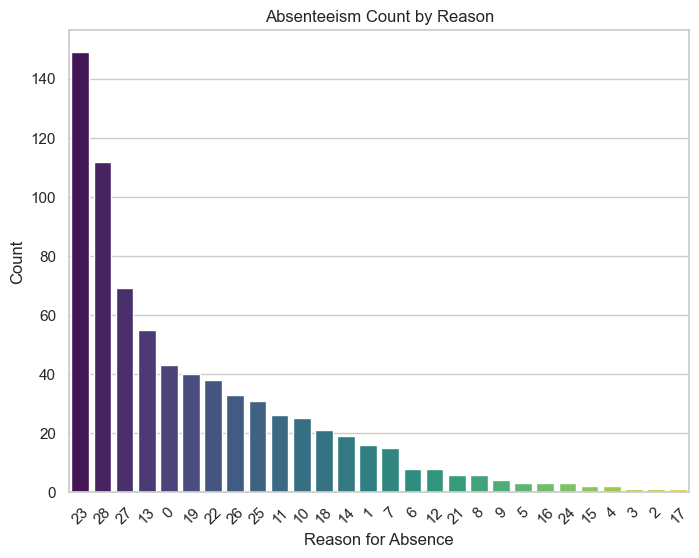

In [55]:
# Absenteeism Trends by Reason
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=treated_df, x="Reason_for_absence", order=treated_df["Reason_for_absence"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Absenteeism Count by Reason")
plt.xlabel("Reason for Absence")
plt.ylabel("Count")
plt.show()

 #### **2) Absenteeism Across Employee Demographics**

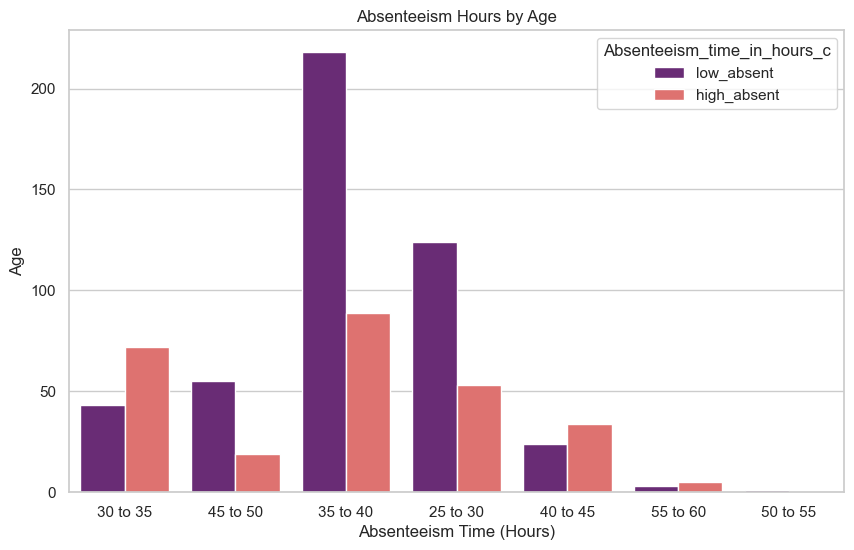

In [57]:
#Absenteeism by Age
plt.figure(figsize=(10, 6))
sns.countplot(data=treated_df, x="Age_c", hue="Absenteeism_time_in_hours_c", palette="magma")
plt.title("Absenteeism Hours by Age")
plt.xlabel("Absenteeism Time (Hours)")
plt.ylabel("Age")
plt.show()

### **Analysis of Absenteeism by Age**

#### **Most Affected Age Group**
- **Ages 35-40** experience the highest absenteeism, primarily in the **low-absent** category.
- **Ages 25-30 and 45-50** also show significant absenteeism.
  
#### **Patterns Observed**
- **High absenteeism** is more common in younger age groups (**25-30, 30-35**).
- **Older employees (50+)** have the **least absenteeism**.
- **Low absenteeism** is the dominant trend across all age groups.

#### **Insights**
- **Mid-career employees (35-40)** show the highest absenteeism, potentially due to **workload stress** or **personal responsibilities**.
- **Younger employees (25-30)** tend to have higher absenteeism compared to older employees.
- **Older employees (50+)** are more consistent in attendance, possibly due to **greater job stability** or **commitment**.

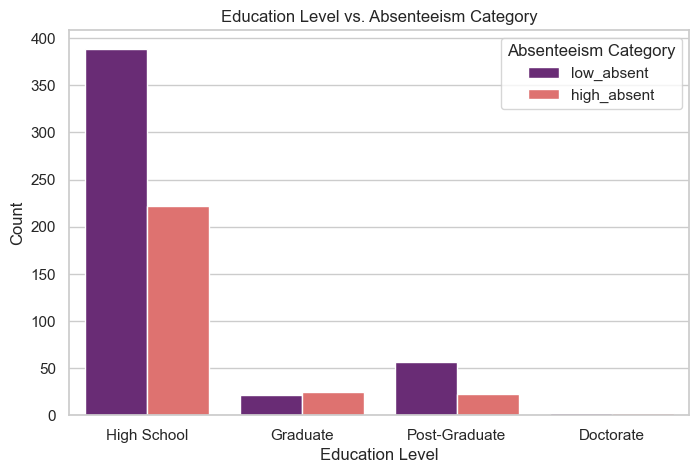

In [59]:
# Absenteeism by education level
plt.figure(figsize=(8, 5))
sns.countplot(data=treated_df, x="Education_c", hue="Absenteeism_time_in_hours_c", palette="magma")
plt.title("Education Level vs. Absenteeism Category")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Absenteeism Category")
plt.show()

### **Absenteeism Analysis by Education Level**

#### **Key Findings**
- **High school graduates have the highest absenteeism** compared to other education levels.
- Both **low absenteeism and high absenteeism cases are more frequent** among employees with a high school education.
- Employees with **higher education (graduate, post-graduate, doctorate) show little to no absenteeism.**

#### **Patterns Observed**
- **Higher education correlates with lower absenteeism**, suggesting that education level might influence work commitment or job roles.
- **Targeting absenteeism interventions** at high school-educated employees could help reduce overall absenteeism.


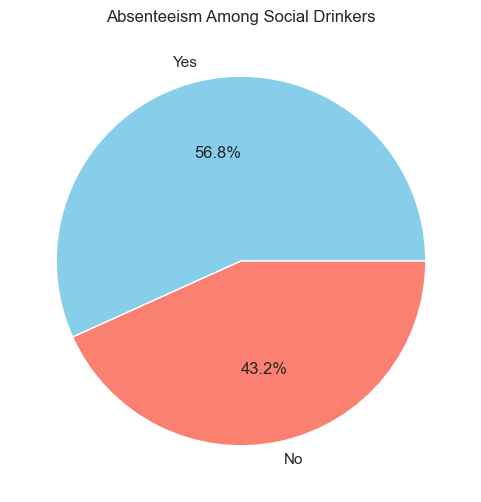

In [61]:
# Absenteeism by social drinking
plt.figure(figsize=(6, 6))
treated_df["Social_Drinker_c"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "salmon"])
plt.title("Absenteeism Among Social Drinkers")
plt.ylabel("")
plt.show()


### **Absenteeism and Social Drinking**

#### **Key Findings**
- **56.8% of absenteeism cases** involve social drinkers.
- **43.2% of absenteeism cases** are from non-drinkers.
- Social drinkers have a slightly higher absenteeism rate than non-drinkers.

#### **Patterns Observed**
- **Social drinking might contribute to absenteeism**, potentially due to health or lifestyle factors.
- **Further analysis** on the frequency of drinking and absenteeism severity could provide deeper insights.


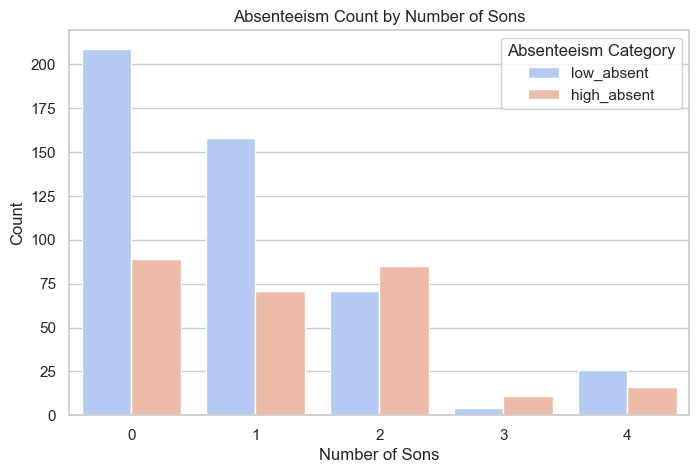

In [63]:
#Absenteeism Count by Number of Sons
plt.figure(figsize=(8, 5))
sns.countplot(data=treated_df, x="Son", hue="Absenteeism_time_in_hours_c", palette="coolwarm")
plt.title("Absenteeism Count by Number of Sons")
plt.xlabel("Number of Sons")
plt.ylabel("Count")
plt.legend(title="Absenteeism Category")
plt.show()

### **Absenteeism and Number of Sons**

#### **Key Findings**
- Employees **without sons** have the highest absenteeism rates.
- Employees with **one son** also show significant absenteeism.
- Absenteeism tends to **decrease** as the number of sons increases.

#### **Patterns Observed**
- Employees with more family responsibilities may have better attendance.
- Further analysis could explore **work-life balance** and **support systems** for employees with children.


####  **3) Work Characteristics Impact**

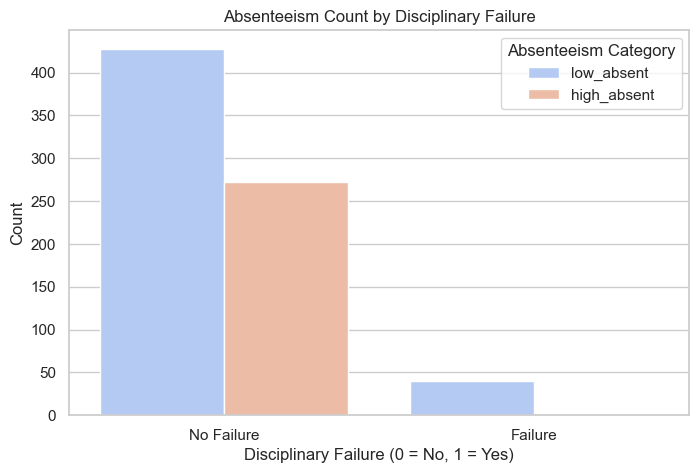

In [66]:
# Absenteeism Count by Disciplinary Failure
plt.figure(figsize=(8, 5))
sns.countplot(data=treated_df, x="Disciplinary_failure_c", hue="Absenteeism_time_in_hours_c", palette="coolwarm")
plt.title("Absenteeism Count by Disciplinary Failure")
plt.xlabel("Disciplinary Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Absenteeism Category")
plt.show()


### **Absenteeism and Disciplinary Failure**

#### **Key Findings**
- Employees with **no disciplinary failures** have higher absenteeism counts.
- However, employees with **disciplinary failures** still show a significant level of absenteeism.
- The **high-absent category** is more prominent among employees with disciplinary failures.

#### **Patterns Observed**
- Employees with past disciplinary failures may have **poor work habits**, contributing to absenteeism.
- Alternatively, **strict disciplinary actions** may lead to **lower motivation and higher absenteeism**.


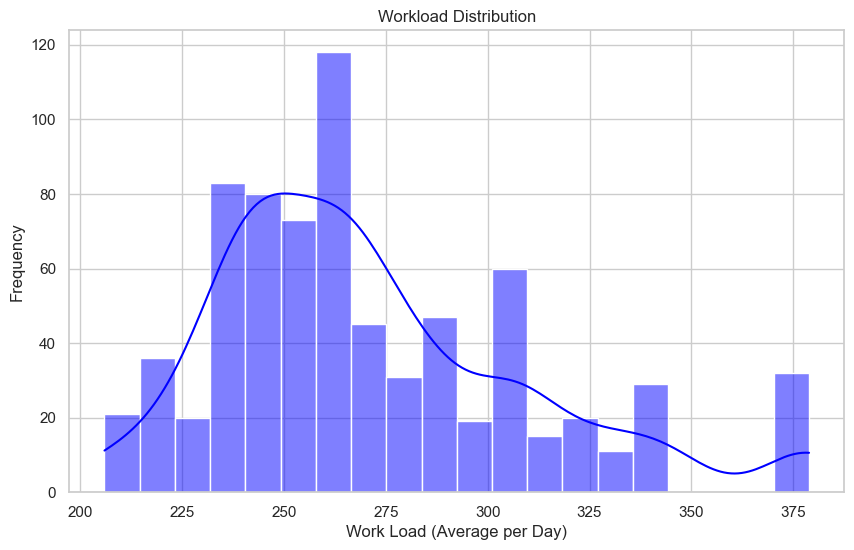

In [68]:
# Workload vs. absenteeism
plt.figure(figsize=(10, 6))
sns.histplot(treated_df["Work_load_Average/day_"], bins=20, kde=True, color="blue")
plt.title("Workload Distribution")
plt.xlabel("Work Load (Average per Day)")
plt.ylabel("Frequency")
plt.show()

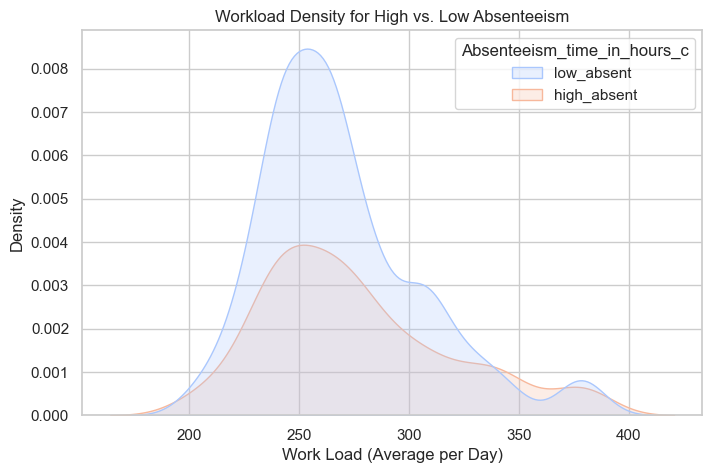

In [69]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=treated_df, x="Work_load_Average/day_", hue="Absenteeism_time_in_hours_c", fill=True, palette="coolwarm")
plt.title("Workload Density for High vs. Low Absenteeism")
plt.xlabel("Work Load (Average per Day)")
plt.ylabel("Density")
plt.show()


### **Workload and Absenteeism Patterns**

#### **Key Insights**
- The **low absenteeism** category (blue) has a peak at around **250 work units per day**.
- The **high absenteeism** category (red) is more spread out but also peaks slightly below **250 work units**.
- **High absenteeism cases** have a broader distribution, indicating absenteeism occurs across **varied workload levels**.

#### **Interpretation**
- Employees with **moderate workloads (around 250 units/day)** tend to have lower absenteeism.
- Higher absenteeism cases appear across **a wider range of workload levels**, suggesting that factors beyond just workload contribute to absenteeism.


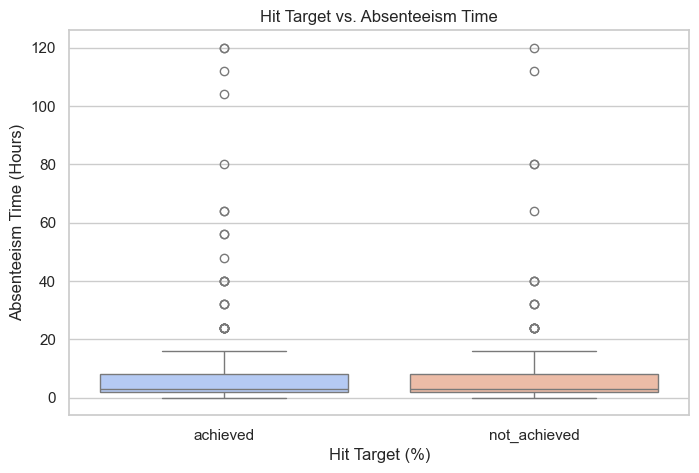

In [71]:
#Hit Target vs. Absenteeism Time
plt.figure(figsize=(8, 5))
sns.boxplot(x="Hit_target_c", y="Absenteeism_time_in_hours", data=treated_df, palette="coolwarm")
plt.title("Hit Target vs. Absenteeism Time")
plt.xlabel("Hit Target (%)")
plt.ylabel("Absenteeism Time (Hours)")
plt.show()


### **Hit Target vs. Absenteeism Time**

#### **Key Insights**
- The **median absenteeism time** is similar for employees who **achieved** and **did not achieve** their targets.
- Both groups have a **similar range of absenteeism hours**, with some employees being absent for up to **15-17 hours**.
- There is **no clear distinction** in absenteeism time between target achievers and non-achievers.

#### **Interpretation**
- Meeting targets may **not be a strong indicator** of absenteeism levels.
- Other factors (e.g., job role, workload, work environment) might play a bigger role in influencing absenteeism.


### **PREDICTING ABSENTEEISM DURATION**

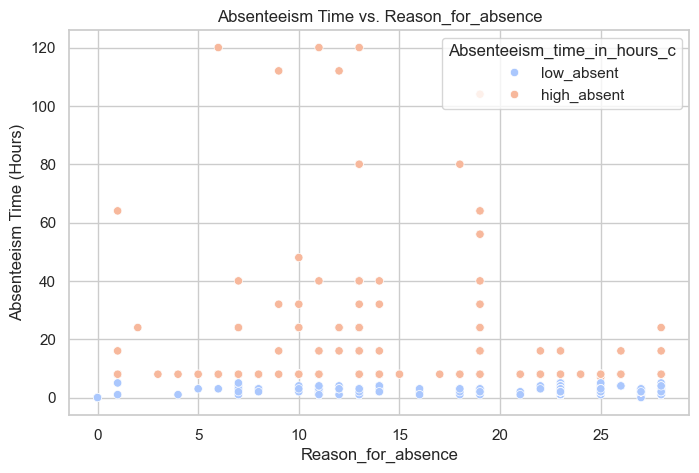

In [74]:
# Absenteeism by Reason_of_absence
plt.figure(figsize=(8, 5))
sns.scatterplot(data=treated_df, x="Reason_for_absence", y="Absenteeism_time_in_hours", hue="Absenteeism_time_in_hours_c", palette="coolwarm")
plt.title("Absenteeism Time vs. Reason_for_absence")
plt.xlabel("Reason_for_absence")
plt.ylabel("Absenteeism Time (Hours)")
plt.show()

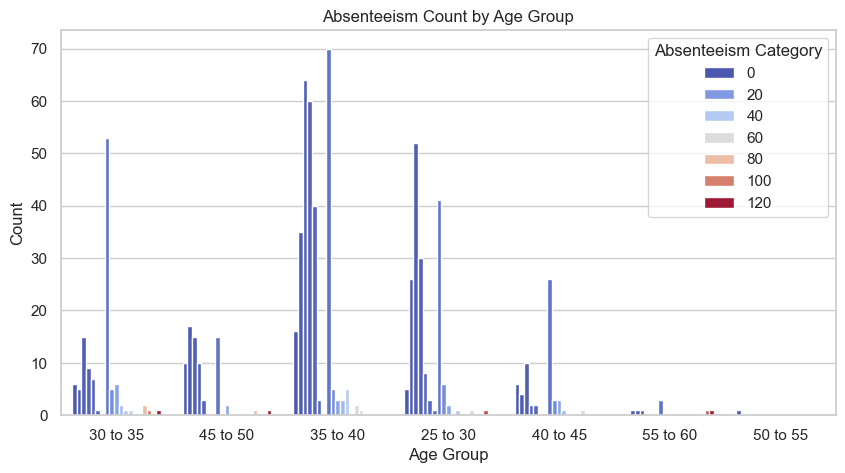

In [75]:
#Visualizing Absenteeism by Age Group
plt.figure(figsize=(10, 5))
sns.countplot(data=treated_df, x="Age_c", hue="Absenteeism_time_in_hours", palette="coolwarm")
plt.title("Absenteeism Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Absenteeism Category")
plt.show()


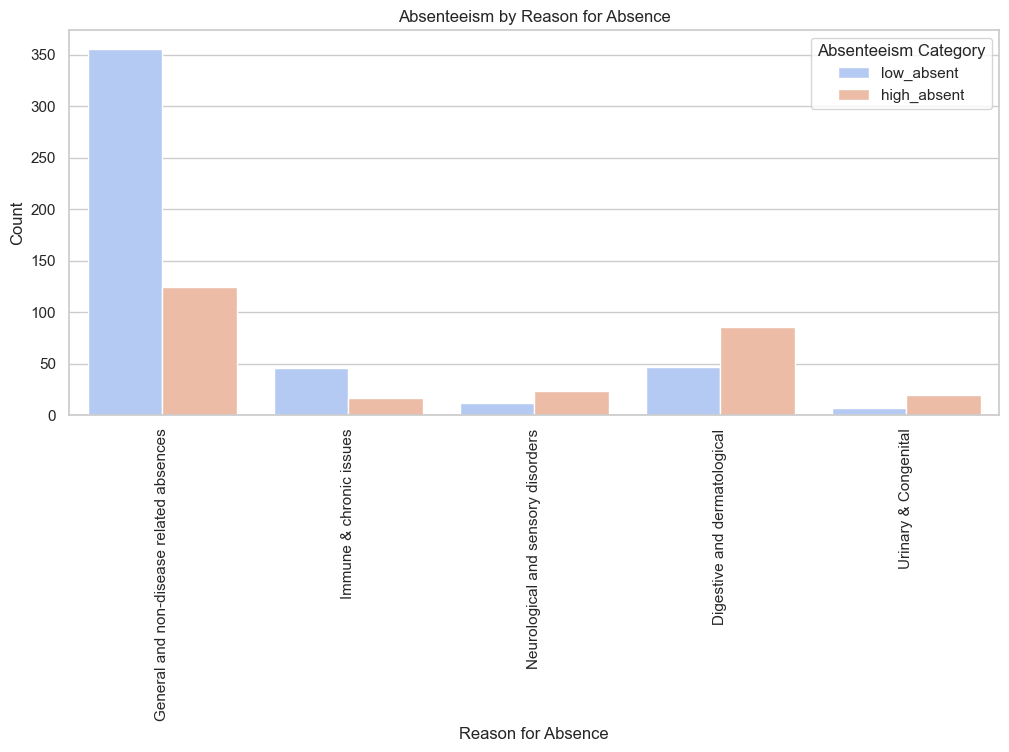

In [76]:
#Absenteeism by Reason for Absence
plt.figure(figsize=(12, 5))
sns.countplot(data=treated_df, x="Reason_for_absence_c", hue="Absenteeism_time_in_hours_c", palette="coolwarm")
plt.title("Absenteeism by Reason for Absence")
plt.xlabel("Reason for Absence")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Absenteeism Category")
plt.show()


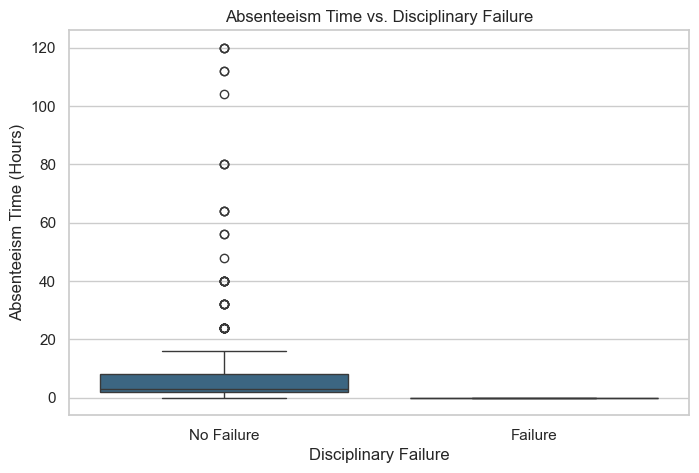

In [77]:
#Absenteeism by Disciplinary Failure
plt.figure(figsize=(8, 5))
sns.boxplot(data=treated_df, x="Disciplinary_failure_c", y="Absenteeism_time_in_hours", palette="viridis")
plt.title("Absenteeism Time vs. Disciplinary Failure")
plt.xlabel("Disciplinary Failure")
plt.ylabel("Absenteeism Time (Hours)")
plt.show()

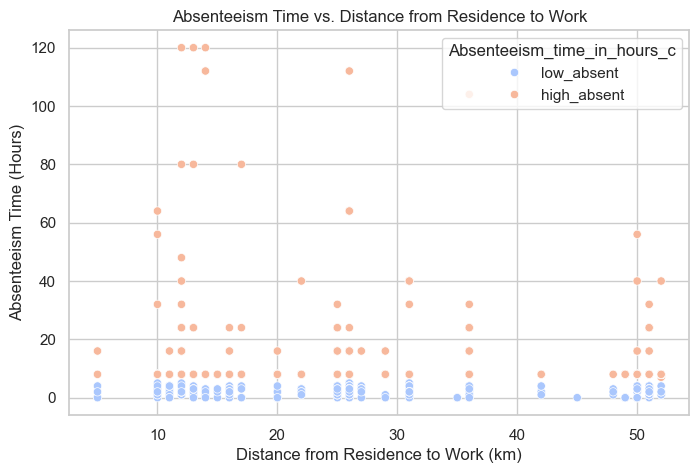

In [78]:
# Absenteeism by Distance from Residence to Work
plt.figure(figsize=(8, 5))
sns.scatterplot(data=treated_df, x="Distance_from_Residence_to_Work", y="Absenteeism_time_in_hours", hue="Absenteeism_time_in_hours_c", palette="coolwarm")
plt.title("Absenteeism Time vs. Distance from Residence to Work")
plt.xlabel("Distance from Residence to Work (km)")
plt.ylabel("Absenteeism Time (Hours)")
plt.show()

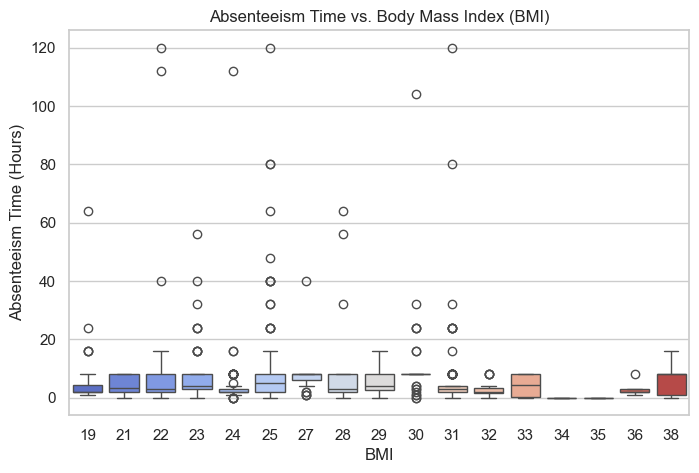

In [79]:
# Absenteeism Distribution by BMI
plt.figure(figsize=(8, 5))
sns.boxplot(data=treated_df, x="Body_mass_index", y="Absenteeism_time_in_hours", palette="coolwarm")
plt.title("Absenteeism Time vs. Body Mass Index (BMI)")
plt.xlabel("BMI")
plt.ylabel("Absenteeism Time (Hours)")
plt.show()


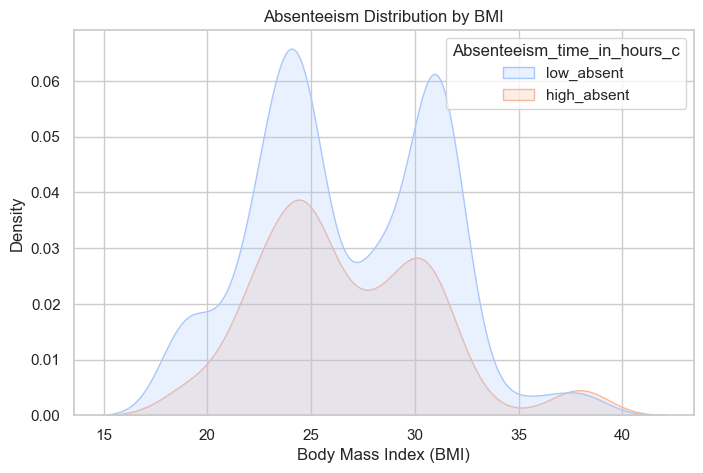

In [80]:
# Absenteeism Distribution by BMI
plt.figure(figsize=(8, 5))
sns.kdeplot(data=treated_df, x="Body_mass_index", hue="Absenteeism_time_in_hours_c", fill=True, palette="coolwarm")
plt.title("Absenteeism Distribution by BMI")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Density")
plt.show()


In [81]:
# removing first two columns from the data
columns_to_drop=["ID"]
treated_df=treated_df.drop(columns_to_drop,axis=1)
treated_df.head()

Reason_for_absence  Month_of_absence  Day_of_the_week  Seasons  \
0                  26                 7                3        1   
1                   0                 7                3        1   
2                  23                 7                4        1   
3                   7                 7                5        1   
4                  23                 7                5        1   

   Transportation_expense  Distance_from_Residence_to_Work  Service_time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work_load_Average/day_  Hit_target  ...  Education_c  Seasons_c  \
0                 239.554          97  ...  High School     Summer   
1                 239.554          97  ...  High School     Summer   
2                 239.554          97  ...  High School     Summer   
3                 239.554          97  ...  High School     Summer   
4                 239.554          97  ...  High School     Summer   

   Day_of_the_week_c  Month_of_absence_c  \
0            Tuesday                July   
1            Tuesday                July   
2          Wednesday                July   
3           Thursday                July   
4           Thursday                July   

                       Reason_for_absence_c  Absenteeism_time_in_hours_c  \
0  General and non-disease related absences                   low_absent   
1                   Immune & chronic issues                   low_absent   
2  General and non-disease related absences                   low_absent   
3        Neurological and sensory disorders                   low_absent   
4  General and non-disease related absences                   low_absent   

   Hit_target_c     Age_c  Distance_c    Workload_c  
0      achieved  30 to 35         Far  Low workload  
1      achieved  45 to 50       Close  Low workload  
2      achieved  35 to 40         Far  Low workload  
3      achieved  35 to 40       Close  Low workload  
4      achieved  30 to 35         Far  Low workload  

[5 rows x 33 columns]

In [82]:
# Selecting only numerical columns
numerical_cols = treated_df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = treated_df[numerical_cols]

# Display selected numerical columns
print("Selected Numerical Columns:")
print(numerical_cols)

Selected Numerical Columns:
Index(['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')


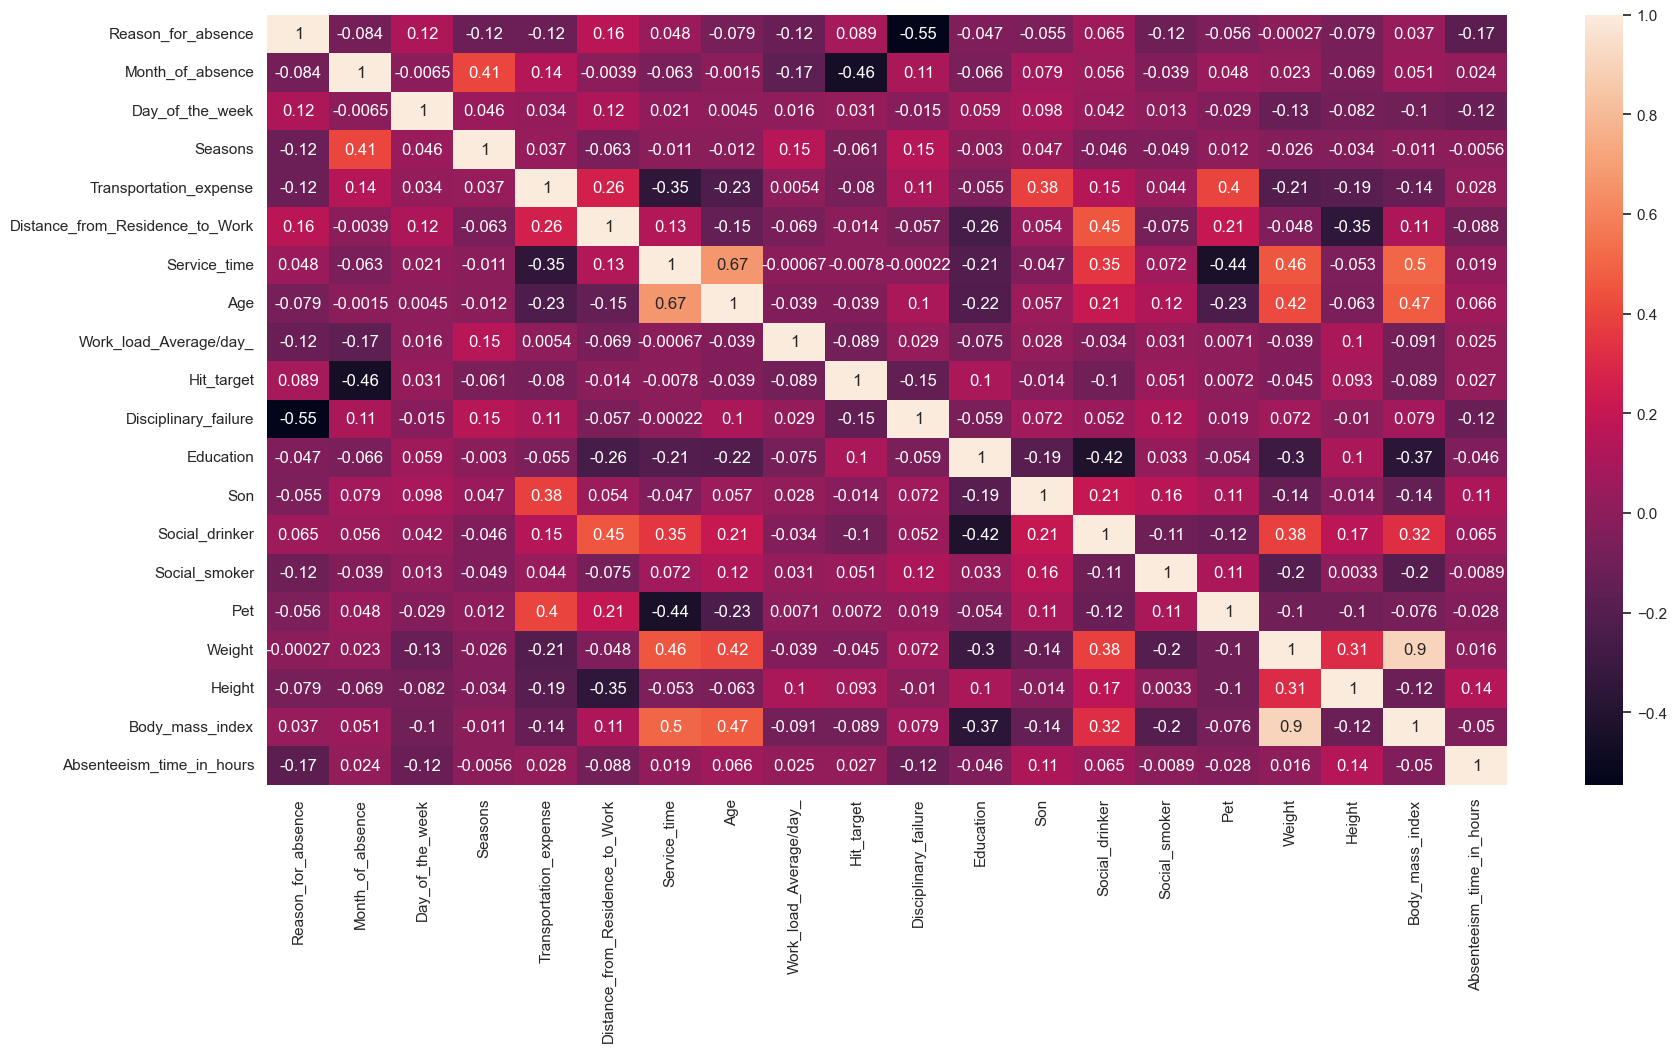

In [83]:
# Compute correlation matrix
corr_matrix = df_numerical.corr()

# Plotting heatmap
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax=sns.heatmap(df_numerical.corr(),annot=True)
plt.show()


In [84]:
df_numerical.corr()[["Absenteeism_time_in_hours"]].sort_values(["Absenteeism_time_in_hours"])

Absenteeism_time_in_hours
Reason_for_absence                               -0.173116
Day_of_the_week                                  -0.124361
Disciplinary_failure                             -0.124248
Distance_from_Residence_to_Work                  -0.088363
Body_mass_index                                  -0.049719
Education                                        -0.046235
Pet                                              -0.028277
Social_smoker                                    -0.008936
Seasons                                          -0.005615
Weight                                            0.015789
Service_time                                      0.019029
Month_of_absence                                  0.024345
Work_load_Average/day_                            0.024749
Hit_target                                        0.026695
Transportation_expense                            0.027585
Social_drinker                                    0.065067
Age                                               0.065760
Son                                               0.113756
Height                                            0.144420
Absenteeism_time_in_hours                         1.000000

In [85]:
# Feature selection based on correlation
col_to_drop = ["Month_of_absence","Seasons","Age","Hit_target","Social_smoker","Pet","Weight","Height"]
df_select=treated_df.drop(col_to_drop,axis=1)
df_select = df_select.select_dtypes(exclude=['object', 'category'])
df_select

Reason_for_absence  Day_of_the_week  Transportation_expense  \
0                    26                3                     289   
1                     0                3                     118   
2                    23                4                     179   
3                     7                5                     279   
4                    23                5                     289   
..                  ...              ...                     ...   
735                  14                3                     289   
736                  11                3                     235   
737                   0                3                     118   
738                   0                4                     231   
739                   0                6                     179   

     Distance_from_Residence_to_Work  Service_time  Work_load_Average/day_  \
0                                 36            13                 239.554   
1                                 13            18                 239.554   
2                                 51            18                 239.554   
3                                  5            14                 239.554   
4                                 36            13                 239.554   
..                               ...           ...                     ...   
735                               36            13                 264.604   
736                               11            14                 264.604   
737                               14            13                 271.219   
738                               35            14                 271.219   
739                               45            14                 271.219   

     Disciplinary_failure  Education  Son  Social_drinker  Body_mass_index  \
0                       0          1    2               1               30   
1                       1          1    1               1               31   
2                       0          1    0               1               31   
3                       0          1    2               1               24   
4                       0          1    2               1               30   
..                    ...        ...  ...             ...              ...   
735                     0          1    2               1               30   
736                     0          3    1               0               29   
737                     0          1    1               1               34   
738                     0          1    2               1               35   
739                     0          1    1               0               25   

     Absenteeism_time_in_hours  
0                            4  
1                            0  
2                            2  
3                            4  
4                            2  
..                         ...  
735                          8  
736                          4  
737                          0  
738                          0  
739                          0  

[740 rows x 12 columns]

In [86]:
#selected_features = ["Reason_for_absence","Education",'Disciplinary_failure',"Distance_from_Residence_to_Work","Service_time","Work_load_Average/day_","Son","Social_drinker","Body_mass_index","Day_of_the_week","Transportation_expense"]

# **TASK-1: IDENTIFYING EMPLOYEES AT THE RISK OF ABSENTEEISM**

In [88]:
# Defining target variable (binary classification: High vs. Low Absenteeism)
mean_absenteeism = df_select["Absenteeism_time_in_hours"].mean()
df_select["Absenteeism_Class"] = (df_select["Absenteeism_time_in_hours"] >= mean_absenteeism).astype(int)

In [89]:
df_select

Reason_for_absence  Day_of_the_week  Transportation_expense  \
0                    26                3                     289   
1                     0                3                     118   
2                    23                4                     179   
3                     7                5                     279   
4                    23                5                     289   
..                  ...              ...                     ...   
735                  14                3                     289   
736                  11                3                     235   
737                   0                3                     118   
738                   0                4                     231   
739                   0                6                     179   

     Distance_from_Residence_to_Work  Service_time  Work_load_Average/day_  \
0                                 36            13                 239.554   
1                                 13            18                 239.554   
2                                 51            18                 239.554   
3                                  5            14                 239.554   
4                                 36            13                 239.554   
..                               ...           ...                     ...   
735                               36            13                 264.604   
736                               11            14                 264.604   
737                               14            13                 271.219   
738                               35            14                 271.219   
739                               45            14                 271.219   

     Disciplinary_failure  Education  Son  Social_drinker  Body_mass_index  \
0                       0          1    2               1               30   
1                       1          1    1               1               31   
2                       0          1    0               1               31   
3                       0          1    2               1               24   
4                       0          1    2               1               30   
..                    ...        ...  ...             ...              ...   
735                     0          1    2               1               30   
736                     0          3    1               0               29   
737                     0          1    1               1               34   
738                     0          1    2               1               35   
739                     0          1    1               0               25   

     Absenteeism_time_in_hours  Absenteeism_Class  
0                            4                  0  
1                            0                  0  
2                            2                  0  
3                            4                  0  
4                            2                  0  
..                         ...                ...  
735                          8                  1  
736                          4                  0  
737                          0                  0  
738                          0                  0  
739                          0                  0  

[740 rows x 13 columns]

In [90]:
# Retrieving "Absenteeism_time_in_hours_enc" column from the dataset and storing into another dataframe
last_col_df = pd.DataFrame(df_select[["Absenteeism_Class"]])
last_col_df

# Removing "Absenteeism_time_in_hours_enc" column from the dataset as scaling is not required for this column
new_df = pd.DataFrame(df_select.drop(["Absenteeism_time_in_hours","Absenteeism_Class"], axis=1))
new_df

Reason_for_absence  Day_of_the_week  Transportation_expense  \
0                    26                3                     289   
1                     0                3                     118   
2                    23                4                     179   
3                     7                5                     279   
4                    23                5                     289   
..                  ...              ...                     ...   
735                  14                3                     289   
736                  11                3                     235   
737                   0                3                     118   
738                   0                4                     231   
739                   0                6                     179   

     Distance_from_Residence_to_Work  Service_time  Work_load_Average/day_  \
0                                 36            13                 239.554   
1                                 13            18                 239.554   
2                                 51            18                 239.554   
3                                  5            14                 239.554   
4                                 36            13                 239.554   
..                               ...           ...                     ...   
735                               36            13                 264.604   
736                               11            14                 264.604   
737                               14            13                 271.219   
738                               35            14                 271.219   
739                               45            14                 271.219   

     Disciplinary_failure  Education  Son  Social_drinker  Body_mass_index  
0                       0          1    2               1               30  
1                       1          1    1               1               31  
2                       0          1    0               1               31  
3                       0          1    2               1               24  
4                       0          1    2               1               30  
..                    ...        ...  ...             ...              ...  
735                     0          1    2               1               30  
736                     0          3    1               0               29  
737                     0          1    1               1               34  
738                     0          1    2               1               35  
739                     0          1    1               0               25  

[740 rows x 11 columns]

In [91]:
# Data Scaling
cols=new_df.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(new_df)
df_scaled=pd.DataFrame(df_scaled,columns=cols)
df_scaled

Reason_for_absence  Day_of_the_week  Transportation_expense  \
0              0.804938        -0.643947                1.011408   
1             -2.280124        -0.643947               -1.544379   
2              0.448970         0.059924               -0.632665   
3             -1.449530         0.763796                0.861947   
4              0.448970         0.763796                1.011408   
..                  ...              ...                     ...   
735           -0.618937        -0.643947                1.011408   
736           -0.974905        -0.643947                0.204318   
737           -2.280124        -0.643947               -1.544379   
738           -2.280124         0.059924                0.144533   
739           -2.280124         1.467667               -0.632665   

     Distance_from_Residence_to_Work  Service_time  Work_load_Average/day_  \
0                           0.429556      0.101770               -0.818212   
1                          -1.121694      1.242825               -0.818212   
2                           1.441240      1.242825               -0.818212   
3                          -1.661258      0.329981               -0.818212   
4                           0.429556      0.101770               -0.818212   
..                               ...           ...                     ...   
735                         0.429556      0.101770               -0.176427   
736                        -1.256585      0.329981               -0.176427   
737                        -1.054248      0.101770               -0.006949   
738                         0.362110      0.329981               -0.006949   
739                         1.036566      0.329981               -0.006949   

     Disciplinary_failure  Education       Son  Social_drinker  \
0               -0.239046  -0.433857  0.893723        0.872872   
1                4.183300  -0.433857 -0.017234        0.872872   
2               -0.239046  -0.433857 -0.928191        0.872872   
3               -0.239046  -0.433857  0.893723        0.872872   
4               -0.239046  -0.433857  0.893723        0.872872   
..                    ...        ...       ...             ...   
735             -0.239046  -0.433857  0.893723        0.872872   
736             -0.239046   2.538869 -0.017234       -1.145644   
737             -0.239046  -0.433857 -0.017234        0.872872   
738             -0.239046  -0.433857  0.893723        0.872872   
739             -0.239046  -0.433857 -0.017234       -1.145644   

     Body_mass_index  
0           0.775932  
1           1.009438  
2           1.009438  
3          -0.625100  
4           0.775932  
..               ...  
735         0.775932  
736         0.542427  
737         1.709954  
738         1.943459  
739        -0.391595  

[740 rows x 11 columns]

In [92]:
abs(df_scaled.corr())>=0.7

Reason_for_absence  Day_of_the_week  \
Reason_for_absence                             True            False   
Day_of_the_week                               False             True   
Transportation_expense                        False            False   
Distance_from_Residence_to_Work               False            False   
Service_time                                  False            False   
Work_load_Average/day_                        False            False   
Disciplinary_failure                          False            False   
Education                                     False            False   
Son                                           False            False   
Social_drinker                                False            False   
Body_mass_index                               False            False   

                                 Transportation_expense  \
Reason_for_absence                                False   
Day_of_the_week                                   False   
Transportation_expense                             True   
Distance_from_Residence_to_Work                   False   
Service_time                                      False   
Work_load_Average/day_                            False   
Disciplinary_failure                              False   
Education                                         False   
Son                                               False   
Social_drinker                                    False   
Body_mass_index                                   False   

                                 Distance_from_Residence_to_Work  \
Reason_for_absence                                         False   
Day_of_the_week                                            False   
Transportation_expense                                     False   
Distance_from_Residence_to_Work                             True   
Service_time                                               False   
Work_load_Average/day_                                     False   
Disciplinary_failure                                       False   
Education                                                  False   
Son                                                        False   
Social_drinker                                             False   
Body_mass_index                                            False   

                                 Service_time  Work_load_Average/day_  \
Reason_for_absence                      False                   False   
Day_of_the_week                         False                   False   
Transportation_expense                  False                   False   
Distance_from_Residence_to_Work         False                   False   
Service_time                             True                   False   
Work_load_Average/day_                  False                    True   
Disciplinary_failure                    False                   False   
Education                               False                   False   
Son                                     False                   False   
Social_drinker                          False                   False   
Body_mass_index                         False                   False   

                                 Disciplinary_failure  Education    Son  \
Reason_for_absence                              False      False  False   
Day_of_the_week                                 False      False  False   
Transportation_expense                          False      False  False   
Distance_from_Residence_to_Work                 False      False  False   
Service_time                                    False      False  False   
Work_load_Average/day_                          False      False  False   
Disciplinary_failure                             True      False  False   
Education                                       False       True  False   
Son                                             False      False   True   
Social_drinker 

In [93]:
# Appending the "Absenteeism_time_in_hours" column to the scaled DataFrame
df_scaled=pd.concat([df_scaled,last_col_df],axis=1)
df_scaled.head()

Reason_for_absence  Day_of_the_week  Transportation_expense  \
0            0.804938        -0.643947                1.011408   
1           -2.280124        -0.643947               -1.544379   
2            0.448970         0.059924               -0.632665   
3           -1.449530         0.763796                0.861947   
4            0.448970         0.763796                1.011408   

   Distance_from_Residence_to_Work  Service_time  Work_load_Average/day_  \
0                         0.429556      0.101770               -0.818212   
1                        -1.121694      1.242825               -0.818212   
2                         1.441240      1.242825               -0.818212   
3                        -1.661258      0.329981               -0.818212   
4                         0.429556      0.101770               -0.818212   

   Disciplinary_failure  Education       Son  Social_drinker  Body_mass_index  \
0             -0.239046  -0.433857  0.893723        0.872872         0.775932   
1              4.183300  -0.433857 -0.017234        0.872872         1.009438   
2             -0.239046  -0.433857 -0.928191        0.872872         1.009438   
3             -0.239046  -0.433857  0.893723        0.872872        -0.625100   
4             -0.239046  -0.433857  0.893723        0.872872         0.775932   

   Absenteeism_Class  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [94]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason_for_absence               740 non-null    float64
 1   Day_of_the_week                  740 non-null    float64
 2   Transportation_expense           740 non-null    float64
 3   Distance_from_Residence_to_Work  740 non-null    float64
 4   Service_time                     740 non-null    float64
 5   Work_load_Average/day_           740 non-null    float64
 6   Disciplinary_failure             740 non-null    float64
 7   Education                        740 non-null    float64
 8   Son                              740 non-null    float64
 9   Social_drinker                   740 non-null    float64
 10  Body_mass_index                  740 non-null    float64
 11  Absenteeism_Class                740 non-null    int32  
dtypes: float64(11), int32(

# **MODEL 1: - Logistic Regression**

## **1. Preparation of training and test datasets**

In [97]:
#Creating test and training datasets
emp_train, emp_test= train_test_split(df_scaled,train_size=0.8,random_state=0)
print(emp_train.shape)
print(emp_test.shape)

(592, 12)
(148, 12)


In [98]:
X_train=emp_train.drop(columns="Absenteeism_Class",axis=1)
y_train=emp_train['Absenteeism_Class']
X_test=emp_test.drop(columns='Absenteeism_Class',axis=1)
y_test=emp_test['Absenteeism_Class']

In [99]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(592, 11) (148, 11) (592,) (148,)


## **2. Training the model**

In [101]:
# Logistic Regression - training the model
logreg=LogisticRegression().fit(X_train,y_train)

# Using the trained model to predict the outcome of the X_Test dataset
y_pred=logreg.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## **3. Model Evaluation**

### **a) Confusion matrix**

In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[75 10]
 [24 39]]


In [105]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

print('t-,f+,f-,t+:',tn,fp,fn,tp)


t-,f+,f-,t+: 75 10 24 39


### **b) ROC-AUC**

In [107]:
# ROC Score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("recall_score:", recall_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))
print("accuracy_score:", accuracy_score(y_test,y_pred) )
print("precision_score:", precision_score(y_test,y_pred))

recall_score: 0.6190476190476191
f1_score: 0.6964285714285714
accuracy_score: 0.7702702702702703
precision_score: 0.7959183673469388


### **3) ROC curve**

In [109]:
# ROC curve
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print("roc:",roc)

roc: 0.8371615312791784


<Figure size 1400x1000 with 0 Axes>

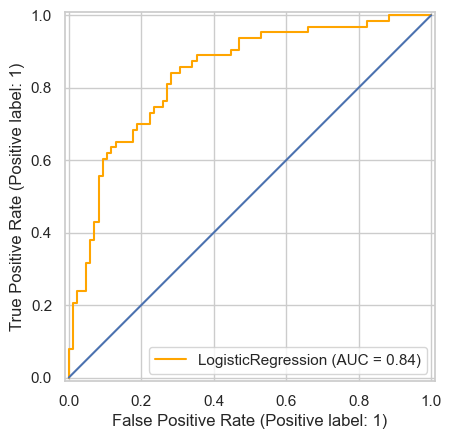

In [110]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
RocCurveDisplay.from_estimator(logreg,X_test,y_test,color="orange")
plt.plot([0,1],[0,1])
plt.show()

## **Logistic Regression Model Performance Interpretation**

### **Confusion Matrix Values:**
- **True Positives (T+):** 39 → Correctly predicted positive cases.
- **False Positives (F+):** 10 → Incorrectly predicted positive cases.
- **False Negatives (F-):** 24 → Missed positive cases.
- **True Negatives (T-):** 75 → Correctly predicted negative cases.

### **Performance Metrics:**
- **Recall:** `0.619` → The model correctly identifies 61.9% of actual positive cases. A lower recall means some absenteeism cases are being missed.
- **F1-score:** `0.696` → This balances precision and recall, indicating a good balance.
- **Accuracy:** `0.770` → The model correctly classifies 77% of the cases.
- **Precision:** `0.796` → Of all predicted positives, about 79.6% are actually positive, meaning fewer false positives.
- **ROC AUC:** `0.837` → The model has good discrimination ability (closer to 1 is better).

### **Key Takeaways:**
- The model has **good accuracy and precision**, meaning it predicts absenteeism well while avoiding too many false alarms.
- However, **recall is lower**, meaning some absenteeism cases are missed.
- **AUC of 0.837** suggests strong model performance in distinguishing between absenteeism classes.
- If missing absenteeism cases is critical, improving **recall** by adjusting the classification threshold or handling class imbalance might be necessary.

# **MODEL 2: - KNN MODEL:**

In [113]:
from sklearn import datasets, neighbors
from ipywidgets import interactive
import warnings

%matplotlib inline

### **MODEL BUILDING**

Minimum error:-0.2432 at K = 7


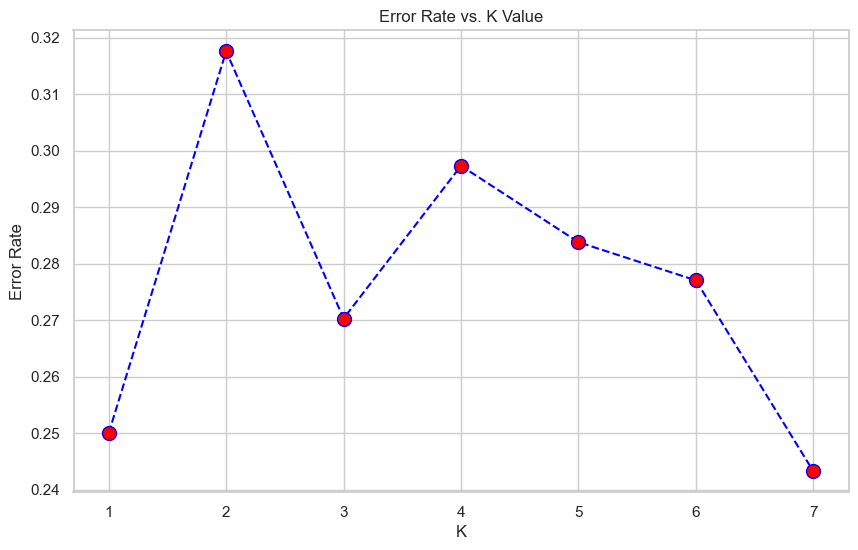

In [115]:
#MODEL BUILDING
from sklearn import neighbors
error_rate = []

# Loop through K values
for K in range(1,8):
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

# Plot Error Rate vs K
plt.figure(figsize=(10, 6))
plt.plot(range(1,8), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print(f"Minimum error:-{min(error_rate):.4f} at K =",error_rate.index(min(error_rate))+1)
plt.show()

In [116]:
# Optimum value of K
Optimum_K=error_rate.index(min(error_rate))+1
print("K:",Optimum_K)

K: 7


In [117]:
# Building the Model
# learning the classifier
clf=neighbors.KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [118]:
# Model Properties
print("clf_classes:",clf.classes_)
print("clf_neighbors:",clf.n_neighbors)

clf_classes: [0 1]
clf_neighbors: 7


In [119]:
# EVALUATING MODEL PERFORMANCE

In [120]:
# Using the trained model to predict the outcome of the X_Test dataset
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [121]:
# Checking shapes before computing metrics
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

# Computing metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred, average="micro"))
print("F1 score:", f1_score(y_test, y_pred, average="micro"))
print("Precision score", precision_score(y_pred,y_test,average = "micro"))

y_test shape: (148,)
y_pred shape: (148,)
Accuracy score: 0.7567567567567568
Recall score: 0.7567567567567568
F1 score: 0.7567567567567568
Precision score 0.7567567567567568


In [122]:
# ROC Score
from sklearn.metrics import roc_auc_score

# Predicting probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Computing ROC AUC Score for binary classification
roc = roc_auc_score(y_test, y_pred_prob)

print("ROC AUC Score:", roc)

ROC AUC Score: 0.8287581699346405


## **Interpretation of KNN Model Performance**

### **Optimum K Selection**
- The graph plots **Error Rate vs. K Value**.
- The minimum error occurs at **K = 7**, meaning **K=7** is the optimal number of neighbors for the KNN model.

### **KNN Model Performance Metrics**
- **Accuracy Score:** `0.757` → The model correctly classifies 75.7% of cases.
- **Recall Score:** `0.757` → 75.7% of actual positive cases are correctly identified.
- **F1 Score:** `0.757` → Balances precision and recall, indicating good performance.
- **Precision Score:** `0.757` → Of all predicted positives, 75.7% are actually positive.
- **ROC AUC Score:** `0.829` → Shows strong discrimination ability between classes.

---

### **Comparison: Logistic Regression vs. KNN**
| Metric           | Logistic Regression | KNN Model |
|-----------------|--------------------|-----------|
| Accuracy        | **0.770**           | 0.757     |
| Recall         | 0.619               | **0.757** |
| F1 Score       | 0.696               | **0.757** |
| Precision      | **0.796**           | 0.757     |
| ROC AUC Score  | **0.837**           | 0.829     |

### **Key Takeaways**
- **Logistic Regression performs better in accuracy (77.0%)** compared to KNN (75.7%).
- **KNN has a better recall (75.7%)** than Logistic Regression (61.9%), meaning it identifies absenteeism cases more effectively.
- **Precision is higher in Logistic Regression (79.6%)**, meaning fewer false positives.
- **F1-score is better for KNN**, suggesting a better balance of precision and recall.
- **ROC AUC is slightly better in Logistic Regression (0.837 vs. 0.829)**, meaning it has a marginally better ability to distinguish between absenteeism classes.

### **Model to Choose?**
- If minimizing **false negatives** (i.e., identifying absenteeism cases correctly) is crucial, **KNN is better** due to its higher recall.
- If **overall accuracy and precision** are more important (avoiding false positives), **Logistic Regression is preferable**.
- **Logistic Regression generalizes better**, while KNN might be more sensitive to noise due to its reliance on nearest neighbors.

### **Based on the performance metrics, Logistic Regression is the better choice for this problem.**

### **Reasons for Choosing Logistic Regression:**
#### Higher Accuracy (77.0%) → More correct predictions overall.
#### Higher Precision (79.6%) → Fewer false positives, meaning better reliability when predicting absenteeism.
#### Higher ROC AUC (0.837 vs. 0.829) → Slightly better ability to distinguish between absenteeism and non-absenteeism cases.
#### Better Generalization → Logistic Regression is less sensitive to noise and works better on large datasets.


# **TASK-2: GROUPING EMPLOYEES WITH SIMILAR ABSENTEEISM PATTERNS**

## **K-MEANS CLUSTERING**

In [126]:
df_select

Reason_for_absence  Day_of_the_week  Transportation_expense  \
0                    26                3                     289   
1                     0                3                     118   
2                    23                4                     179   
3                     7                5                     279   
4                    23                5                     289   
..                  ...              ...                     ...   
735                  14                3                     289   
736                  11                3                     235   
737                   0                3                     118   
738                   0                4                     231   
739                   0                6                     179   

     Distance_from_Residence_to_Work  Service_time  Work_load_Average/day_  \
0                                 36            13                 239.554   
1                                 13            18                 239.554   
2                                 51            18                 239.554   
3                                  5            14                 239.554   
4                                 36            13                 239.554   
..                               ...           ...                     ...   
735                               36            13                 264.604   
736                               11            14                 264.604   
737                               14            13                 271.219   
738                               35            14                 271.219   
739                               45            14                 271.219   

     Disciplinary_failure  Education  Son  Social_drinker  Body_mass_index  \
0                       0          1    2               1               30   
1                       1          1    1               1               31   
2                       0          1    0               1               31   
3                       0          1    2               1               24   
4                       0          1    2               1               30   
..                    ...        ...  ...             ...              ...   
735                     0          1    2               1               30   
736                     0          3    1               0               29   
737                     0          1    1               1               34   
738                     0          1    2               1               35   
739                     0          1    1               0               25   

     Absenteeism_time_in_hours  Absenteeism_Class  
0                            4                  0  
1                            0                  0  
2                            2                  0  
3                            4                  0  
4                            2                  0  
..                         ...                ...  
735                          8                  1  
736                          4                  0  
737                          0                  0  
738                          0                  0  
739                          0                  0  

[740 rows x 13 columns]

In [127]:
df_select1 = df_select.drop(columns=['Absenteeism_Class'])
# Displaying the new DataFrame
df_select1

Reason_for_absence  Day_of_the_week  Transportation_expense  \
0                    26                3                     289   
1                     0                3                     118   
2                    23                4                     179   
3                     7                5                     279   
4                    23                5                     289   
..                  ...              ...                     ...   
735                  14                3                     289   
736                  11                3                     235   
737                   0                3                     118   
738                   0                4                     231   
739                   0                6                     179   

     Distance_from_Residence_to_Work  Service_time  Work_load_Average/day_  \
0                                 36            13                 239.554   
1                                 13            18                 239.554   
2                                 51            18                 239.554   
3                                  5            14                 239.554   
4                                 36            13                 239.554   
..                               ...           ...                     ...   
735                               36            13                 264.604   
736                               11            14                 264.604   
737                               14            13                 271.219   
738                               35            14                 271.219   
739                               45            14                 271.219   

     Disciplinary_failure  Education  Son  Social_drinker  Body_mass_index  \
0                       0          1    2               1               30   
1                       1          1    1               1               31   
2                       0          1    0               1               31   
3                       0          1    2               1               24   
4                       0          1    2               1               30   
..                    ...        ...  ...             ...              ...   
735                     0          1    2               1               30   
736                     0          3    1               0               29   
737                     0          1    1               1               34   
738                     0          1    2               1               35   
739                     0          1    1               0               25   

     Absenteeism_time_in_hours  
0                            4  
1                            0  
2                            2  
3                            4  
4                            2  
..                         ...  
735                          8  
736                          4  
737                          0  
738                          0  
739                          0  

[740 rows x 12 columns]

In [128]:
# Data Scaling
cols=df_select1.columns
scaler=StandardScaler()
df_scaled1=scaler.fit_transform(df_select1)
df_scaled1=pd.DataFrame(df_scaled1,columns=cols)
df_scaled1

Reason_for_absence  Day_of_the_week  Transportation_expense  \
0              0.804938        -0.643947                1.011408   
1             -2.280124        -0.643947               -1.544379   
2              0.448970         0.059924               -0.632665   
3             -1.449530         0.763796                0.861947   
4              0.448970         0.763796                1.011408   
..                  ...              ...                     ...   
735           -0.618937        -0.643947                1.011408   
736           -0.974905        -0.643947                0.204318   
737           -2.280124        -0.643947               -1.544379   
738           -2.280124         0.059924                0.144533   
739           -2.280124         1.467667               -0.632665   

     Distance_from_Residence_to_Work  Service_time  Work_load_Average/day_  \
0                           0.429556      0.101770               -0.818212   
1                          -1.121694      1.242825               -0.818212   
2                           1.441240      1.242825               -0.818212   
3                          -1.661258      0.329981               -0.818212   
4                           0.429556      0.101770               -0.818212   
..                               ...           ...                     ...   
735                         0.429556      0.101770               -0.176427   
736                        -1.256585      0.329981               -0.176427   
737                        -1.054248      0.101770               -0.006949   
738                         0.362110      0.329981               -0.006949   
739                         1.036566      0.329981               -0.006949   

     Disciplinary_failure  Education       Son  Social_drinker  \
0               -0.239046  -0.433857  0.893723        0.872872   
1                4.183300  -0.433857 -0.017234        0.872872   
2               -0.239046  -0.433857 -0.928191        0.872872   
3               -0.239046  -0.433857  0.893723        0.872872   
4               -0.239046  -0.433857  0.893723        0.872872   
..                    ...        ...       ...             ...   
735             -0.239046  -0.433857  0.893723        0.872872   
736             -0.239046   2.538869 -0.017234       -1.145644   
737             -0.239046  -0.433857 -0.017234        0.872872   
738             -0.239046  -0.433857  0.893723        0.872872   
739             -0.239046  -0.433857 -0.017234       -1.145644   

     Body_mass_index  Absenteeism_time_in_hours  
0           0.775932                  -0.219511  
1           1.009438                  -0.519767  
2           1.009438                  -0.369639  
3          -0.625100                  -0.219511  
4           0.775932                  -0.369639  
..               ...                        ...  
735         0.775932                   0.080744  
736         0.542427                  -0.219511  
737         1.709954                  -0.519767  
738         1.943459                  -0.519767  
739        -0.391595                  -0.519767  

[740 rows x 12 columns]

### **KNN clustering for numerical columns: "Reason_for_absence" and "Absenteeism_time_in_hours"**

In [130]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Selecting specific columns from df_scaled as cluster centers
selected_columns = df_scaled1[["Reason_for_absence","Absenteeism_time_in_hours"]].values 

# Generating synthetic dataset using selected columns as cluster centers
X, y = make_blobs(n_samples=2500, centers=selected_columns, cluster_std=0.8, random_state=200)

In [131]:
df_scaled1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason_for_absence               740 non-null    float64
 1   Day_of_the_week                  740 non-null    float64
 2   Transportation_expense           740 non-null    float64
 3   Distance_from_Residence_to_Work  740 non-null    float64
 4   Service_time                     740 non-null    float64
 5   Work_load_Average/day_           740 non-null    float64
 6   Disciplinary_failure             740 non-null    float64
 7   Education                        740 non-null    float64
 8   Son                              740 non-null    float64
 9   Social_drinker                   740 non-null    float64
 10  Body_mass_index                  740 non-null    float64
 11  Absenteeism_time_in_hours        740 non-null    float64
dtypes: float64(12)
memory 

In [132]:
# "Reason_for_absence"
X

array([[ 1.99383927, -0.77434262],
       [-0.52903017,  0.91086768],
       [-1.7897169 ,  0.13616543],
       ...,
       [ 1.05759613,  0.1622356 ],
       [-0.26458916, -1.5298367 ],
       [ 0.699246  , -0.21954458]])

In [133]:
# "Absenteeism_time_in_hours"
y

array([ 78, 317, 303, ..., 122, 645,  30])

In [134]:
X[:,0]

array([ 1.99383927, -0.52903017, -1.7897169 , ...,  1.05759613,
       -0.26458916,  0.699246  ])

In [135]:
X[:,1]

array([-0.77434262,  0.91086768,  0.13616543, ...,  0.1622356 ,
       -1.5298367 , -0.21954458])

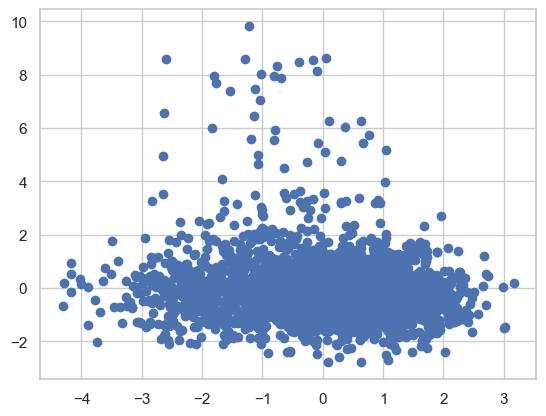

In [136]:
# plotting a scatter plot to visualize the clusters:
plt.scatter(X[:,0],X[:,1])
plt.show()

### **Building the model**

In [138]:
KMeans_model=KMeans(n_clusters=2) # we are creating the model
KMeans_model.fit(X)

KMeans(n_clusters=2)

### **Extracting the features of the model**

In [140]:
KMean_centroids=KMeans_model.cluster_centers_
KMean_centroids

array([[-1.34250375,  0.46371442],
       [ 0.72077846, -0.27920696]])

### **Creating Labels**

In [142]:
#Creating Labels
label=KMeans_model.labels_
label

array([1, 0, 0, ..., 1, 1, 1])

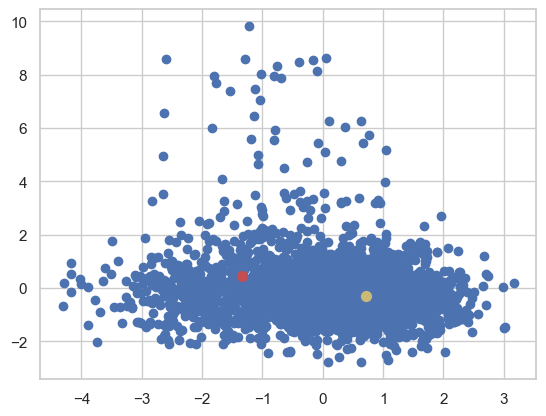

In [143]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(0.72372852, -0.28331585,c="y",s=50)
plt.scatter(-1.33412577,  0.46591214,c="r",s=50)
plt.show()

In [144]:
cluster_1=KMeans_model.cluster_centers_[0]
cluster_1

array([-1.34250375,  0.46371442])

In [145]:
cluster_2=KMeans_model.cluster_centers_[1]
cluster_2

array([ 0.72077846, -0.27920696])

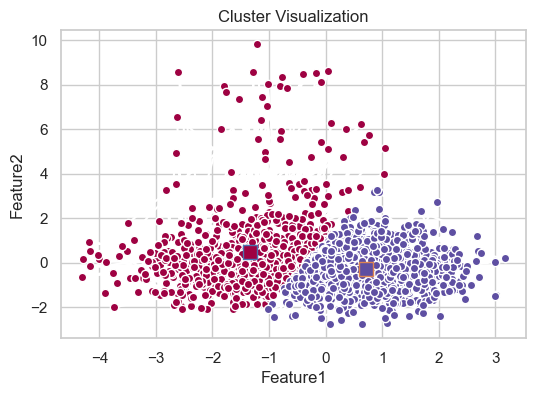

In [146]:
#color for plotting
#plt.cm.Spectral: imports a color map named spectral from the matplotlib.pyplot library
#len(set(labels)) : calculates the number of unique values in the label array
#np.linspace(): creates a list of positions within the spectral color map. There will be one position for each unique cluster label

labels = KMeans_model.labels_
colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
fig=plt.figure(figsize=(6,4))

#create a plot
#ax:This line creates a subplot object named ax ands it to the figure fig
# (1,1,1): specifies the layout of the subplots and it creates a single subplot that occupies the entire figure area

ax=fig.add_subplot(1,1,1)

#for loop: iterates through the clusters and corresponding colors. This K variable will represent the index of the current clusters in each iteration

for K,col in zip(range(len(KMeans_model.cluster_centers_)),colors):
# my_members:this line creates a boolean array named my_members.It uses element-wise comparison to check if each element in the label array (containing cluster labels for the datapoints) matches the current cluster index
    
    my_members=(labels==K)
# if len: handle single cluster case (if cluster_centroid) is a 1d array.This condition checks if the shape of KMeans_Model.cluster_centers_ is a single dimensional array. If true, it extracts the X and y coordinates of the single centroid
    if len(KMeans_model.cluster_centers_.shape)==1:
        centroid_X=KMeans_model.cluster_centers_[0]
        centroid_y=KMeans_model.cluster_centers_[1]
    else:
        cluster_centroid=KMeans_model.cluster_centers_[K]
        centroid_X=cluster_centroid[0] # x coordinate of centroid
        centroid_y=cluster_centroid[1] # y coordinate of centroid
    ax.plot(X[my_members,0],X[my_members,1],"w",markerfacecolor=col,marker="o")
    ax.plot(centroid_X,centroid_y,marker="s",markerfacecolor=col,markersize=10)
ax.set_title("Cluster Visualization")
ax.set_xlabel("Feature1")
ax.set_ylabel("Feature2")
plt.show()

In [147]:
centroid_X=cluster_centroid[0]
centroid_y=cluster_centroid[1]
print(centroid_X)
print(centroid_y)

0.7207784601751523
-0.2792069640000349


In [148]:
# Using test data to predict the clusters using the model
# Initial data in the 2d array
X

array([[ 1.99383927, -0.77434262],
       [-0.52903017,  0.91086768],
       [-1.7897169 ,  0.13616543],
       ...,
       [ 1.05759613,  0.1622356 ],
       [-0.26458916, -1.5298367 ],
       [ 0.699246  , -0.21954458]])

In [149]:
# Unknown data for testing
sample_test=np.array([-1.3,1])
sample_test

array([-1.3,  1. ])

In [150]:
second_test=sample_test.reshape(1,-1)
second_test

array([[-1.3,  1. ]])

In [151]:
predict=KMeans_model.predict(second_test)
predict

array([0])

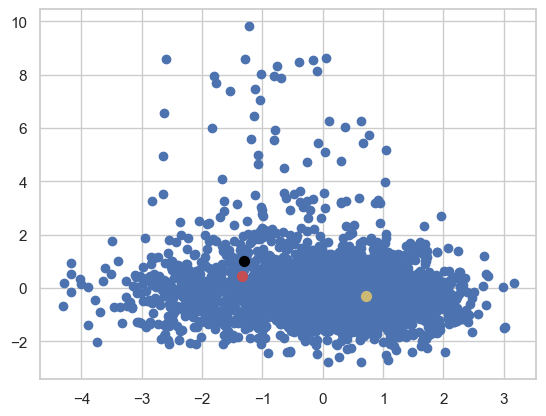

In [152]:
# plotting the prediction values
plt.scatter(X[:,0],X[:,1])
plt.scatter(0.72372852, -0.28331585,c="y",s=50)
plt.scatter(-1.33412577,  0.46591214,c="r",s=50)
plt.scatter(-1.3,1,c="0",s=50)
plt.show()

###  **Rebuilding the model with the optimum K-value**

In [154]:
# Rebuilding the model with the optimum K-value
KMeans_model.inertia_

5099.858334058803

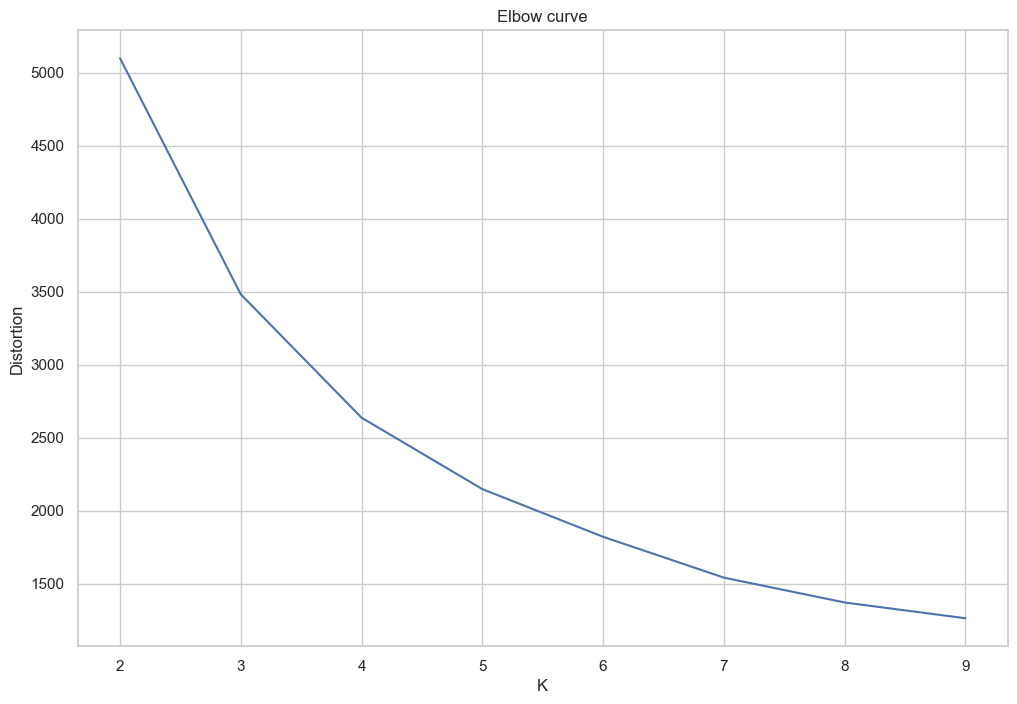

In [155]:
Distortion=[]
for K in range(2,10):
    KMeans_model=KMeans(n_clusters=K)
    KMeans_model.fit(X)
    Distortion.append(KMeans_model.inertia_)
    
figure=plt.figure(figsize=(12,8))
plt.plot(range(2,10),Distortion)
plt.grid(True)
plt.xlabel("K")
plt.ylabel("Distortion")
plt.title("Elbow curve")
plt.show()

### **Interpretation of the K-VALUE:**

**The Elbow Curve analysis suggests that the optimal number of clusters (K) for the dataset is 3 when using the K-Means Clustering model. This indicates that your data naturally divides into three distinct groups, providing the following insights:**

**Predictions & Insights:**
Low Absenteeism Group: Employees who rarely miss work.
Moderate Absenteeism Group: Employees with occasional absences.
High Absenteeism Group: Employees who are frequently absent.

**Actionable Insights:**

Trend Prediction: By tracking the movement of employees across these groups, you can predict future absenteeism trends.
Risk Identification: Employees in the High Absenteeism Group can be flagged for further support or analysis to understand underlying causes.
Targeted Interventions: Create interventions for each group, such as wellness programs for the High Absenteeism Group or incentives for the Low Absenteeism Group, to improve overall attendance.
This approach helps to focus on key absenteeism patterns, enabling more informed decision-making and effective employee management.

### **Finding the optimum value of K and cluster efficiency using silhouette_score**

In [158]:
#Finding the optimum value of K and cluster efficiency using silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters= 2 average silhouette_score= 0.3924631506914863
For n_clusters= 3 average silhouette_score= 0.40928046069467916
For n_clusters= 4 average silhouette_score= 0.3430698973475678
For n_clusters= 5 average silhouette_score= 0.3262017697987123
For n_clusters= 6 average silhouette_score= 0.3253530993451336
For n_clusters= 7 average silhouette_score= 0.3232134413350769
For n_clusters= 8 average silhouette_score= 0.310370137843317
For n_clusters= 9 average silhouette_score= 0.32453290723423733
For n_clusters= 10 average silhouette_score= 0.33119033412649396


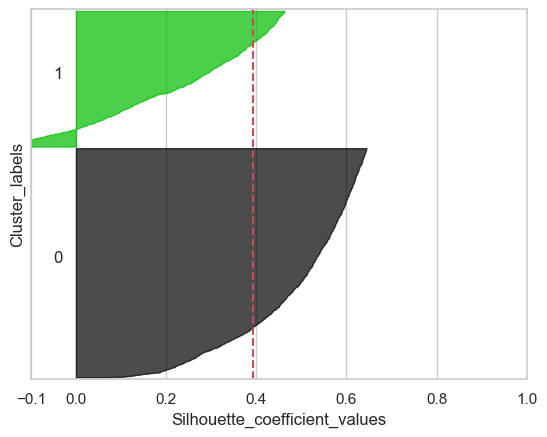

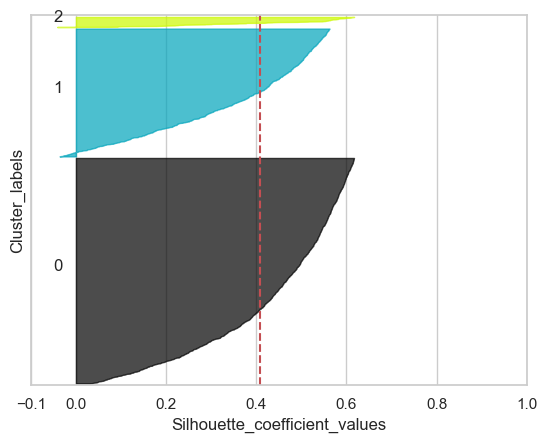

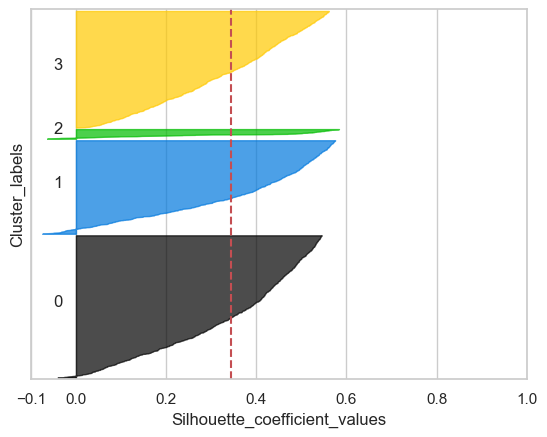

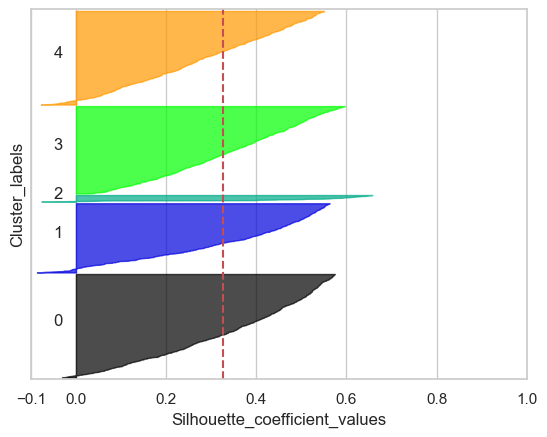

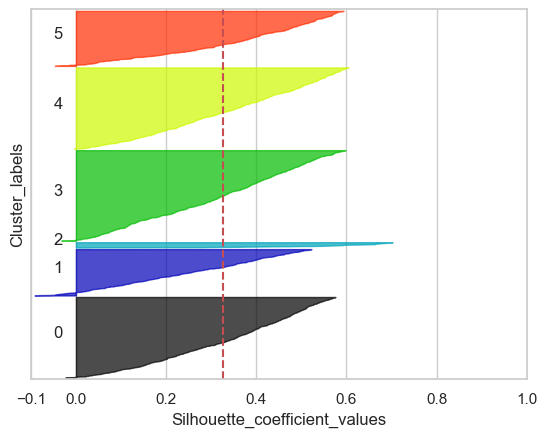

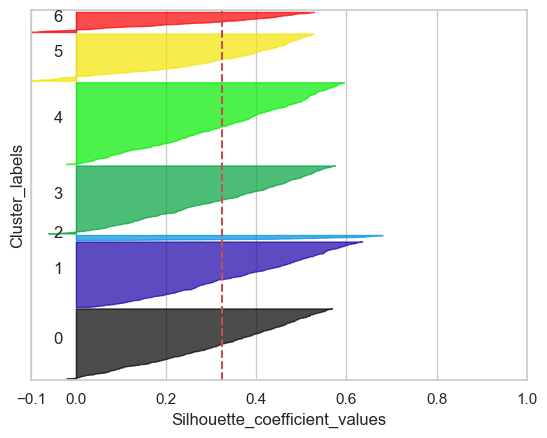

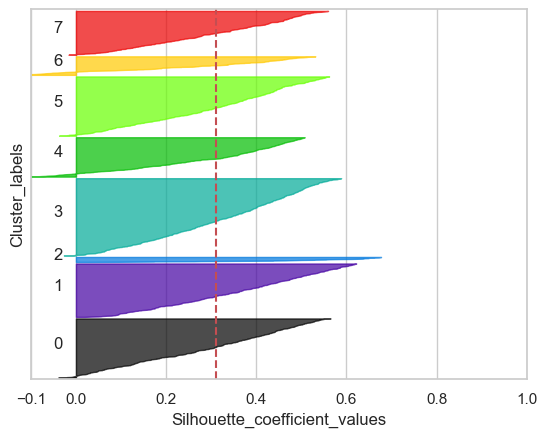

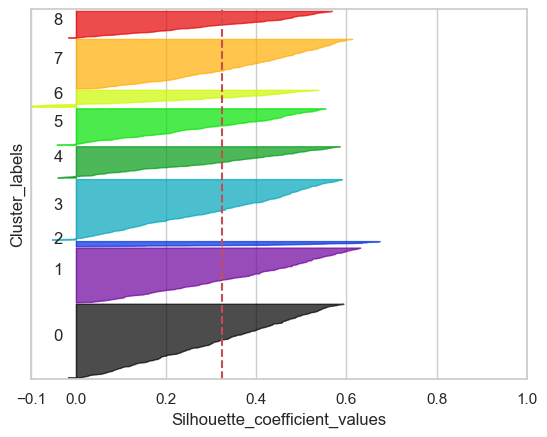

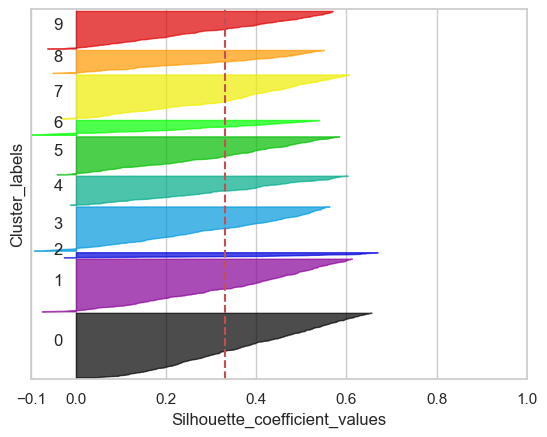

In [159]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    figure,ax1=plt.subplots(1,1) #create a subplot with 1 row and 2 columns
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])
    cluster=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels=cluster.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=",n_clusters,"average silhouette_score=",silhouette_avg)
    #Compute the silhouette_score for each sample
    sample_silhouette_values=silhouette_samples(X,cluster_labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values=np.sort(ith_cluster_silhouette_values) # sorting the score for current cluster in ascending order.
        #This is done to arrange the bars in the silhouette plot from left to right based on their silhouette_scores
        size_cluster_i=ith_cluster_silhouette_values.shape[0] # This line calculates the number of data points in the cluster i
        y_upper=y_lower+size_cluster_i #this calculates the upper limit for the vertical region where the silhouette plot for the current cluster i will be drawn
        #it adds the number of data points in the cluster to the current lower_limit (y_lower)
        color=cm.nipy_spectral(float(i)/n_clusters) #cm: color map from the matplotlib library
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        #label the silhouette plots with their cluster number at the center
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        #compute the new y_lower for the next plot
        y_lower=y_upper+10
    ax1.set_xlabel("Silhouette_coefficient_values")
    ax1.set_ylabel("Cluster_labels")
    #The vertical line for average silhouettes_scores for all values
    ax1.axvline(x= silhouette_avg,color="r",linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
plt.show()
    

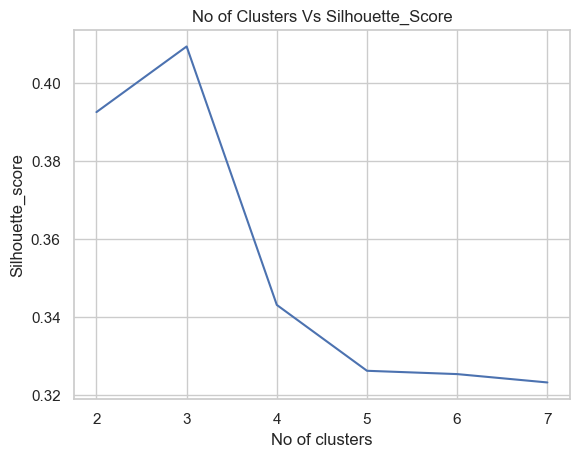

In [160]:
#Alternate way
n_clusters_range=range(2,8)
silhouette_score_s=[]
for n_clusters in n_clusters_range: #train model and get the silhouette score
    silhouette_score_s.append(silhouette_score(X,KMeans(n_clusters=n_clusters,random_state=10).fit_predict(X)))
plt.plot(n_clusters_range,silhouette_score_s)
plt.xlabel("No of clusters")
plt.ylabel("Silhouette_score")
plt.title("No of Clusters Vs Silhouette_Score")
plt.show()

### **Rebuild the model using K=3:**

In [162]:
# Rebuild the model using K=3:
K_model_3=KMeans(n_clusters=3)
K_model_3.fit(X)

KMeans(n_clusters=3)

In [163]:
#Extracting features of the model:
clusters_centroid_3=K_model_3.cluster_centers_
clusters_centroid_3

array([[-0.63870429,  4.95834905],
       [ 0.75232717, -0.21827118],
       [-1.3873468 , -0.03447658]])

In [164]:
labels_3=K_model_3.labels_
labels_3

array([1, 2, 2, ..., 1, 1, 1])

### **Visualizing the final clusters**

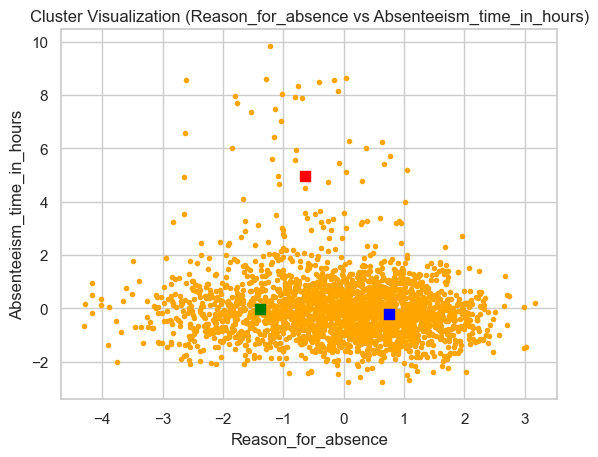

In [166]:
# Visualizing the final clusters
plt.scatter(X[:, 0], X[:, 1], marker=".", c="orange")

# Getting centroids of the clusters
clusters_centroid_3 = K_model_3.cluster_centers_

# Choosing the corresponding coordinates for centroids (again using Feature1 and Feature2)
centroid_colors = ["red", "blue", "green"]
c = 0

# Plot the centroids in the 2D space (using Reason_for_absence and Absenteeism_time_in_hours for centroid coordinates)
for centroid in clusters_centroid_3:
    plt.scatter(centroid[0], centroid[1], s=50, c=centroid_colors[c], marker="s")
    c += 1

plt.title("Cluster Visualization (Reason_for_absence vs Absenteeism_time_in_hours)")
plt.xlabel("Reason_for_absence")
plt.ylabel("Absenteeism_time_in_hours")
plt.show()

### **CALINSKI HARBASZ INDEX (CHI):**

In [168]:
from sklearn.metrics import calinski_harabasz_score
#Assuming we have our data X and cluster labels
ch_index=calinski_harabasz_score(X,labels_3)
print("ch_index:",ch_index)

ch_index: 1580.7294885962158


### **DAVIS BOULDIN INDEX (DBI):**

In [170]:
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X,labels_3)
db_score
print("db_index:",db_score)

db_index: 0.8454020394306029


## **Clustering Model Evaluation**

### **Key Metrics Interpretation:**
1. **Calinski-Harabasz Index (CH Index = 1580.81):**  
   - A high CH index suggests that the clusters are **well-defined, compact, and distinct** from each other.  
   - Higher values indicate **better clustering quality** with minimal within-cluster variance.

2. **Davies-Bouldin Index (DB Index = 0.8452):**  
   - A lower DB index represents **better cluster separation**.  
   - The value indicates that the clusters are moderately well-separated, but some overlap may exist.

3. **Silhouette Score (0.4014):**  
   - Measures how well each point is assigned to its cluster.  
   - A score of **0.40 suggests moderate clustering quality**, indicating that some points may be closer to cluster boundaries.

## **Conclusion:**
- The clustering model shows **a good structure**, with relatively **well-separated and compact clusters**.
- Some **overlapping** between clusters might exist.
- Further improvements, such as **tuning the number of clusters** or using **alternative clustering methods**, could enhance cluster separation and cohesion.


### **Apply K-Means clustering**

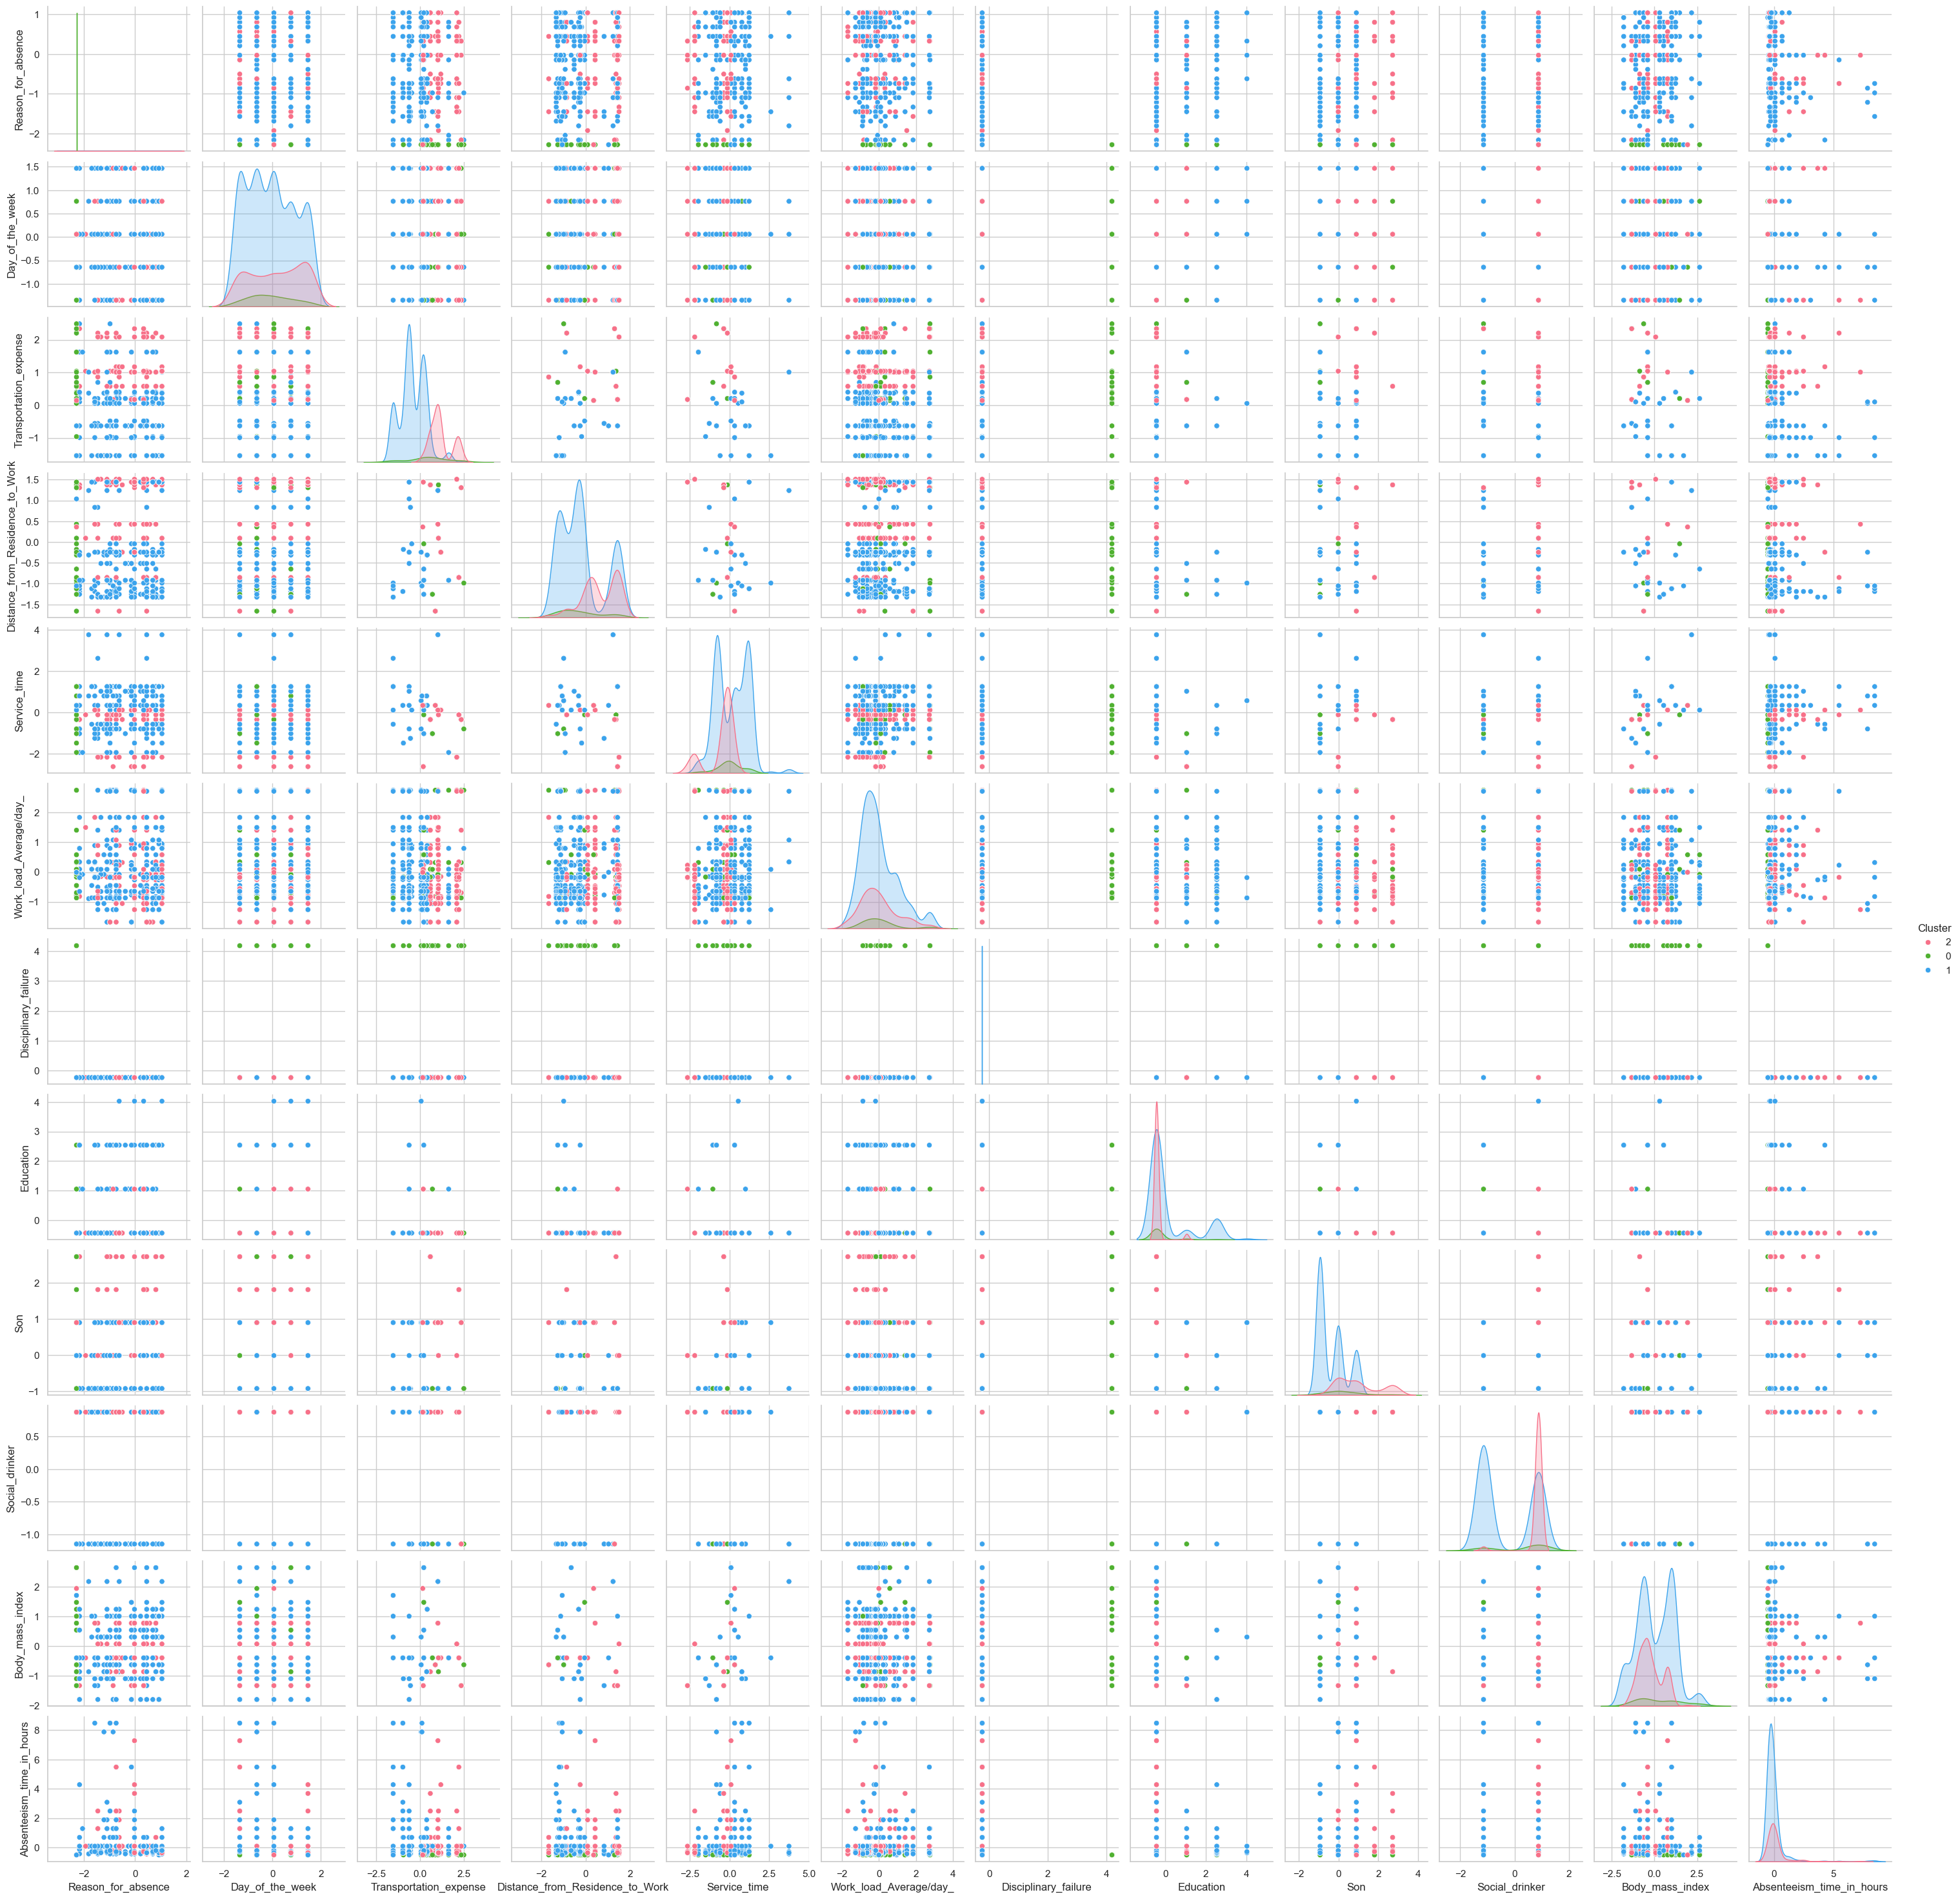

In [173]:
# Apply K-Means clustering
df_cluster = df_scaled1.copy()  # Creating a copy of the scaled data

# Choosing the number of clusters (determined optimal K=3 using the Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=0)  
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled1)

# Converting cluster labels to categorical for better visualization
df_cluster['Cluster'] = df_cluster['Cluster'].astype(str)

# Creating a pair plot to visualize relationships between features and clusters
sns.pairplot(df_cluster, hue="Cluster", diag_kind="kde", palette="husl")
plt.show()


### **Defining churn: Employees with absenteeism above the median are at risk**

In [175]:
# Defining churn: Employees with absenteeism above the median are at risk
median_absenteeism = df_cluster['Absenteeism_time_in_hours'].median()
df_cluster['Churn_Risk'] = np.where(df_cluster['Absenteeism_time_in_hours'] > median_absenteeism, 1, 0)

# Calculating churn rate per cluster
churn_rate = df_cluster.groupby("Cluster")["Churn_Risk"].mean() * 100

# Displaying churn rate per cluster
print("Churn Rate (%) per Cluster:\n", churn_rate)


Churn Rate (%) per Cluster:
 Cluster
0     0.000000
1    40.607211
2    72.254335
Name: Churn_Risk, dtype: float64


### **Plotting the churn rate by clusters**

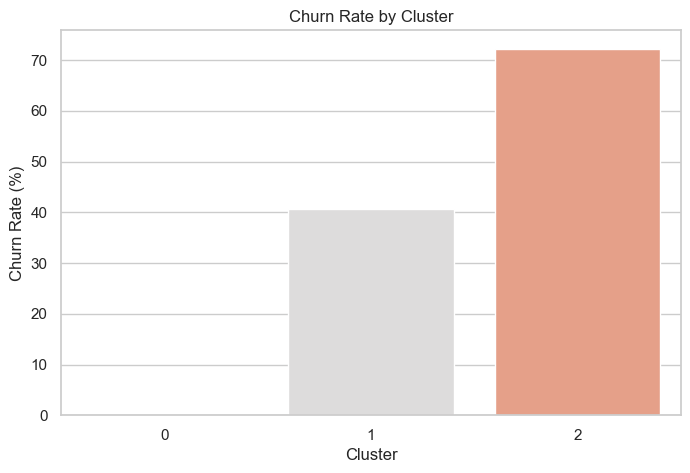

In [177]:
# Plotting the churn rate by clusters
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Cluster")
plt.show()


## **Interpretation of Churn Rate per Cluster**

### **Cluster 0: 0.00% Churn Rate**  
- No employees in this cluster are at risk of churn.  
- Likely consists of employees with **low absenteeism** and **stable work habits**.  

### **Cluster 1: 40.61% Churn Rate**  
- About **41% of employees** in this cluster are at risk.  
- Represents a **moderate risk group**, possibly due to occasional high absenteeism or work-related stress.  

### **Cluster 2: 72.25% Churn Rate**  
- The highest churn risk—**nearly 3 out of 4 employees** are at risk.  
- Likely includes employees with **frequent absenteeism**, possibly due to job dissatisfaction, health issues, or long commute distances.  

## **Possible Actions Based on Insights**
 **Cluster 0:** Maintain engagement and retention strategies to keep absenteeism low.  
 **Cluster 1:** Investigate work-life balance, job stress, or management policies that may help reduce absenteeism.  
 **Cluster 2:** Focus on retention strategies—offer wellness programs, flexible work arrangements, or address underlying issues causing high absenteeism.  


In [179]:
df_numerical.columns

Index(['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

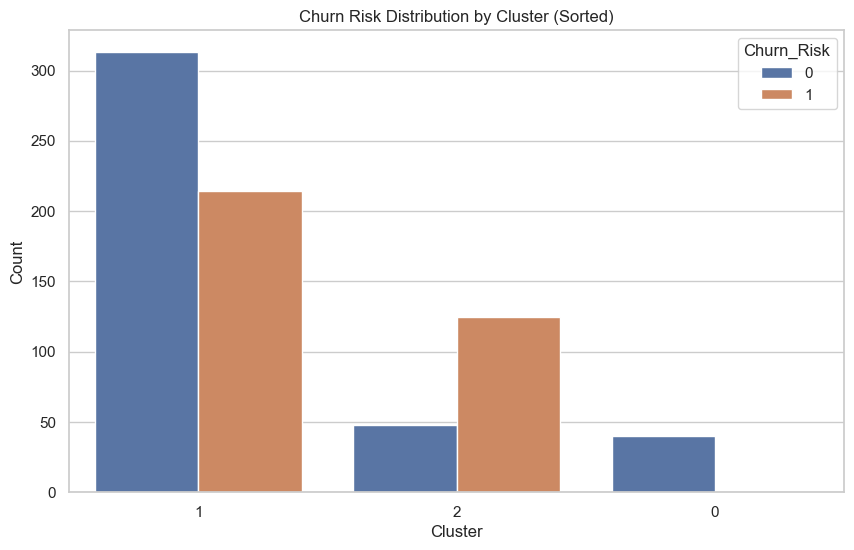

In [308]:
plt.figure(figsize=(10, 6))

# Sorting clusters by count of 'High' churn risk in descending order
sorted_clusters = df_cluster['Cluster'].value_counts().index

sns.countplot(x='Cluster', hue='Churn_Risk', data=df_cluster, order=sorted_clusters)

plt.title("Churn Risk Distribution by Cluster (Sorted)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


### **Interpretation of Churn Risk Distribution by Cluster**

#### **1. Cluster 1 (Leftmost Bar - Highest Count)**
- **Largest group** with **300+ employees**.
- A **significant portion is at low churn risk** (blue).
- However, a **substantial number** are at **high churn risk** (orange).
- This cluster has **both stability and a notable risk segment**, meaning some employees might be disengaged despite the large workforce.

#### **2. Cluster 2 (Middle Bar - Moderate Count)**
- **Fewer employees than Cluster 1**, but **most are at high churn risk** (orange).
- This indicates a **problematic cluster** where **absenteeism is high**, and employees may be **dissatisfied or facing challenges** (e.g., long commutes, high workload).
- Requires urgent attention to **retain these employees**.

#### **3. Cluster 0 (Rightmost Bar - Smallest Count)**
- **Fewest employees overall**.
- Most employees are at **high churn risk** (orange), with very few at low risk (blue).
- This suggests a **specialized group with serious absenteeism issues**.

---

### **Key Takeaways & Actions**
#### **Cluster 1**: Monitor at-risk employees but focus on **maintaining engagement**.  
#### **Cluster 2**: High churn risk! Investigate causes (e.g., workload, job dissatisfaction) and implement **retention strategies**.  
#### **Cluster 0**: Most employees are at risk. Consider interventions such as **wellness programs, flexibility, or targeted engagement efforts**